<a href="https://colab.research.google.com/github/yuktiverma43/Data-Science-Projects/blob/main/Git_Hub_INN_Hotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INN Hotels Project**

**Context**

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:

Loss of resources (revenue) when the hotel cannot resell the room.
Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
Human resources to make arrangements for the guests.
Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**


**Booking_ID:** unique identifier of each booking

**no_of_adults**: Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:

1. Not Selected - No meal plan selected

2. Meal Plan 1 - Breakfast

3. Meal Plan 2 - Half board (breakfast and one other meal)

4. Meal Plan 3 - Full board (breakfast, lunch, and dinner)

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation.

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

**Importing necessary libraries and data**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv')

**Data Overview**

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
data.shape

(36275, 19)

**Observations**

There are 36275 rows and 19 columns present in dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations**

1. Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type and booking_status are of object type.
2. avg_price_per_price is of float type.
3. All other remaining columns are of int type.

In [ ]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

**Observations**

1. The mean no of adults is around 2 people while maxmimum is 4 people. 75% of no of adults who stay at hotel is 2.
2. The maximum no of children who stay at hotel is 10.
3. The maximum weekeend nights spent at hotel i 7 while maximum week nights spent at hotel is 17 with median of 2 week nights.
4. The maximum lead time which is number of days between booking date and arrival date is 443 days. 75% of people have lead time of 126 days.
5. The data contains two arrival years as 2017 and 2018.
6. The maximum average price per room is 540 euros with mean average price is 103.42 euros. 50% of rooms have average price around 99.45 euros while 75% of rooms have average price of 120 euros.
7. The maximum special request is 5 received by guests.

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations**

There is no missing value present in dataset.

In [ ]:
data.duplicated().sum()

np.int64(0)

**Observation**

There is no duplicate rows in dataset.

In [ ]:
df=data.copy()

In [ ]:
df.drop('Booking_ID', axis=1, inplace=True)

As Booking ID is unique, we will drop this column.

**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
col=df.drop('type_of_meal_plan', axis=1)
col=col.drop('room_type_reserved', axis=1)
col=col.drop('market_segment_type', axis=1)
col=col.drop('booking_status', axis=1)
col=col.drop('avg_price_per_room', axis=1)

**Making histogram for numerical column**

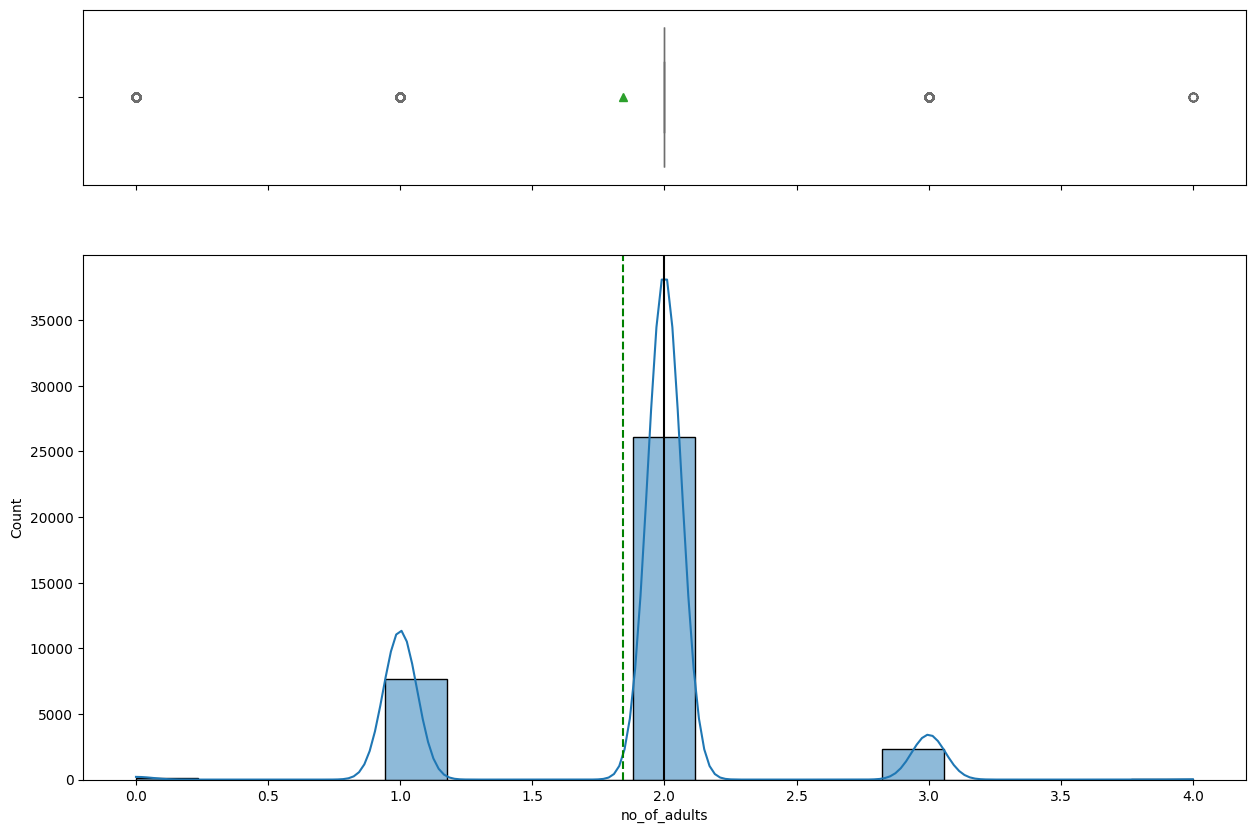

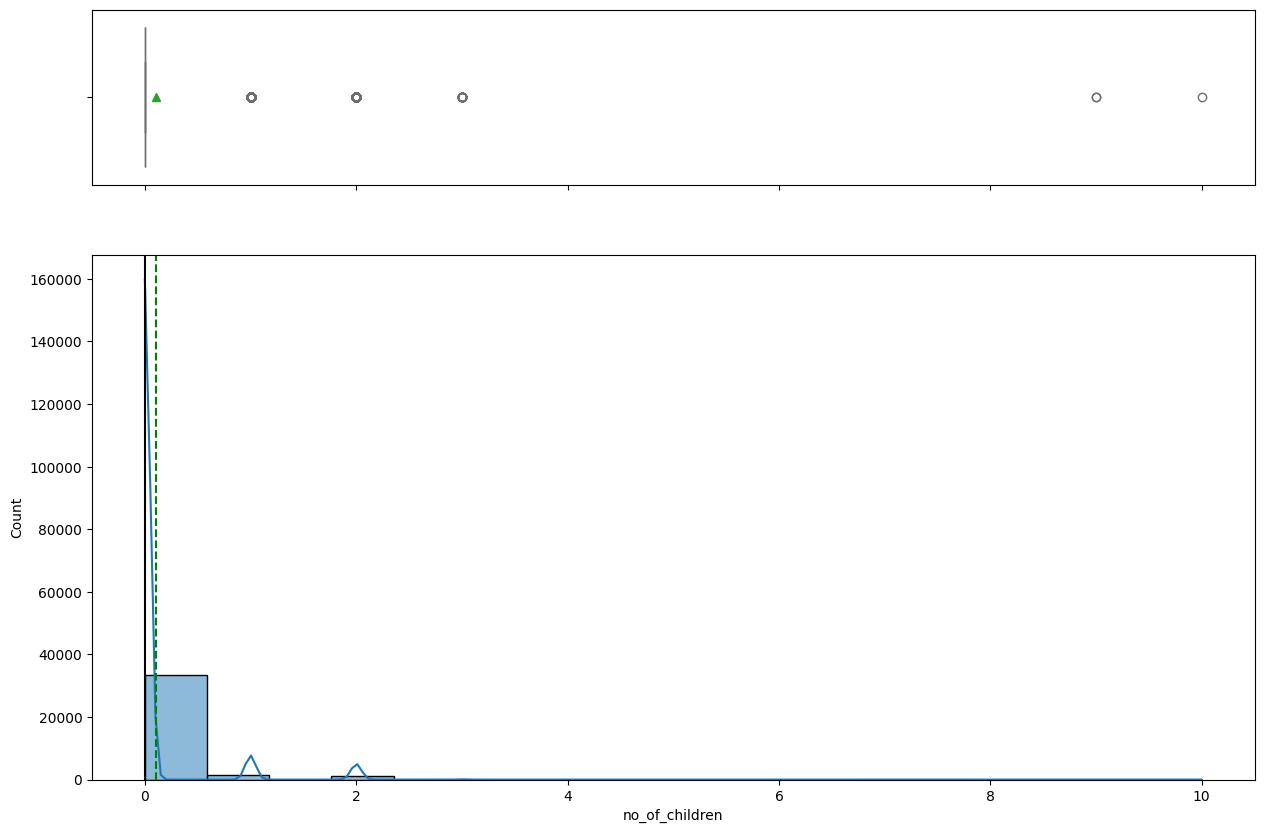

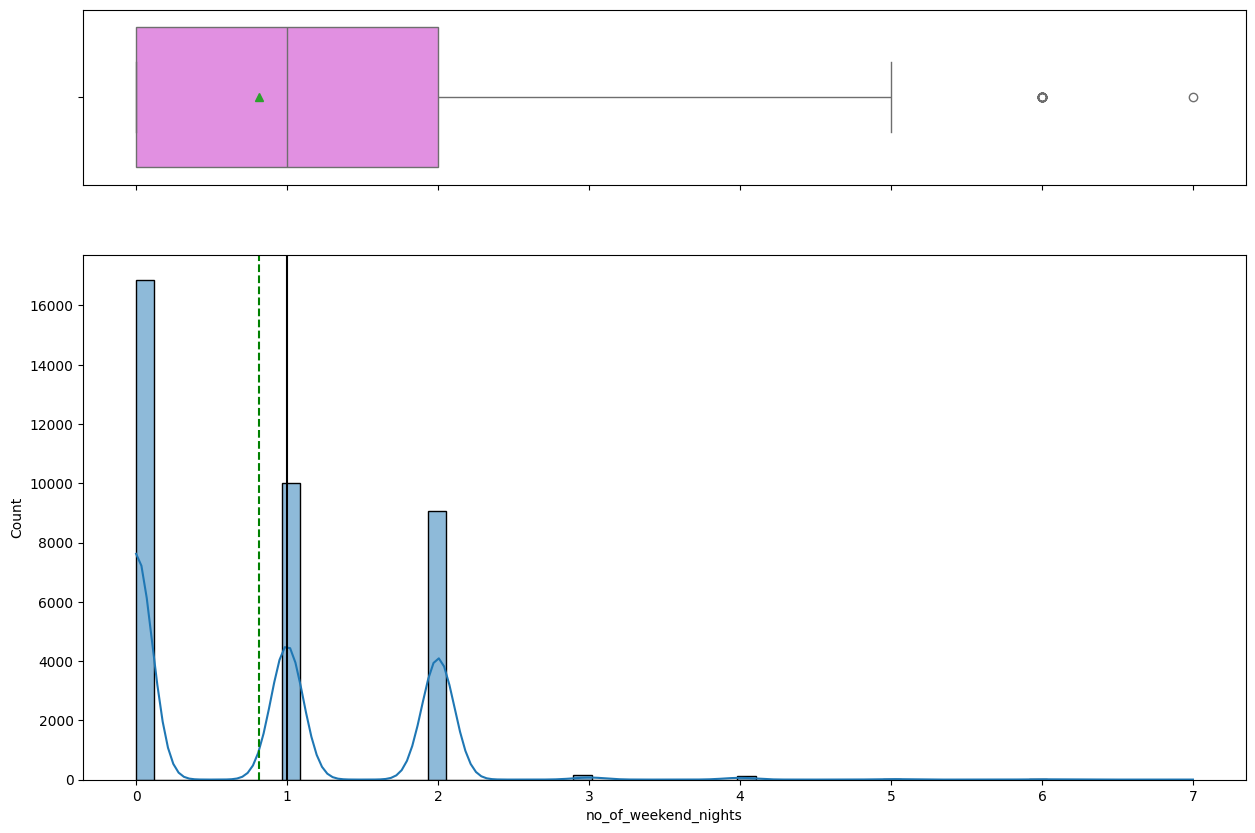

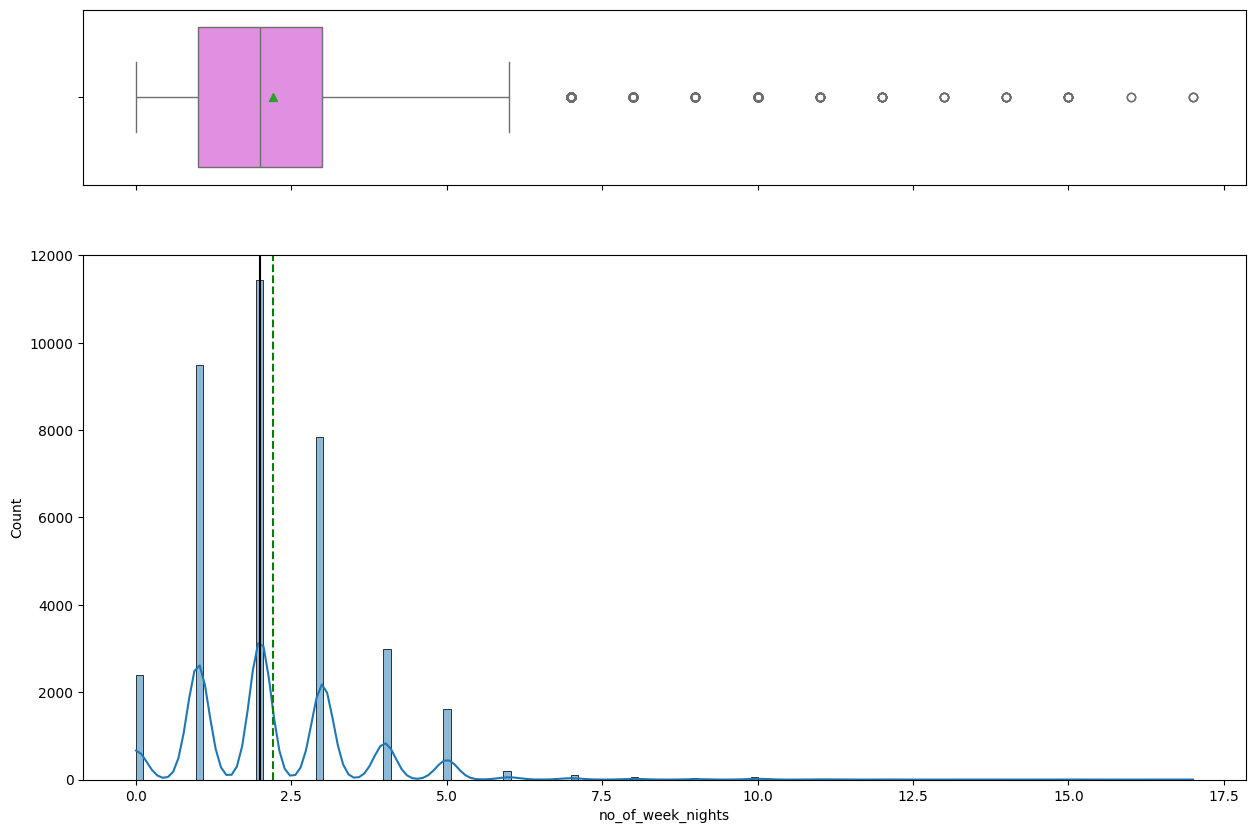

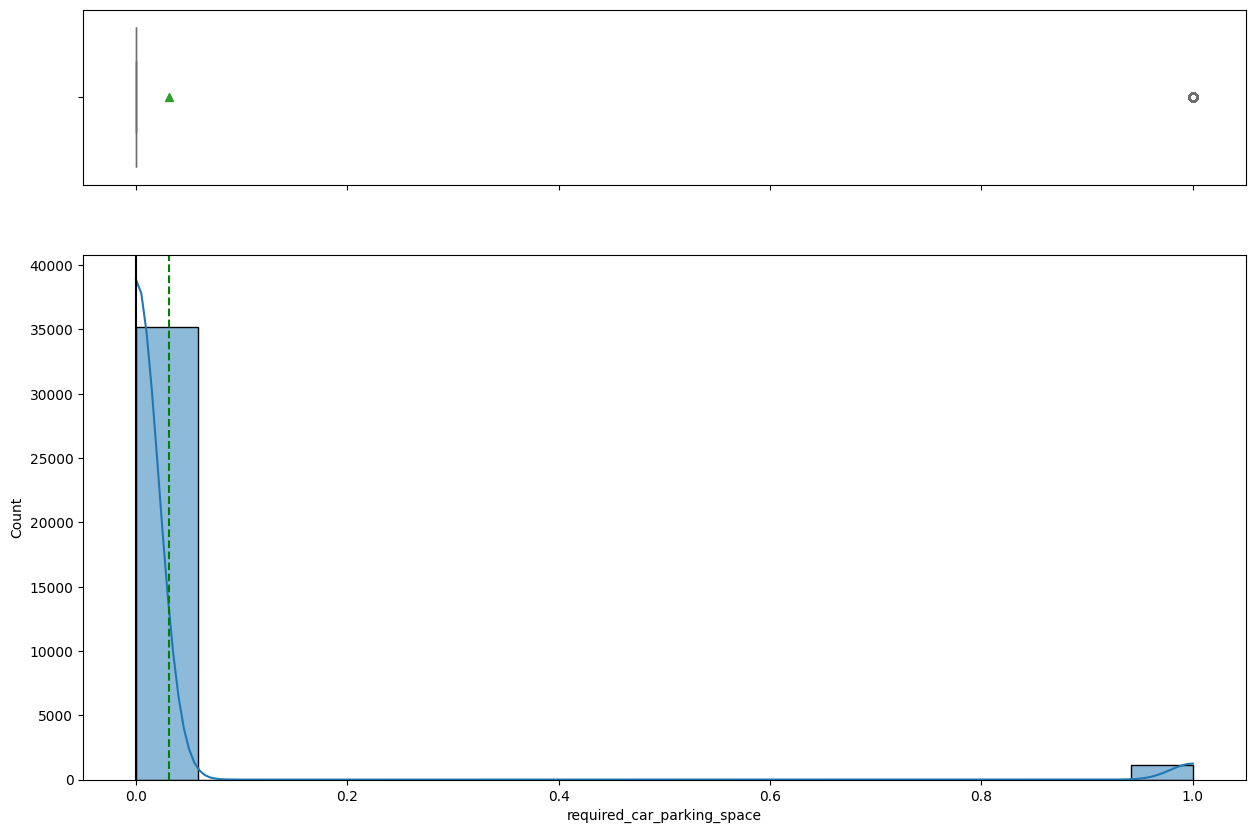

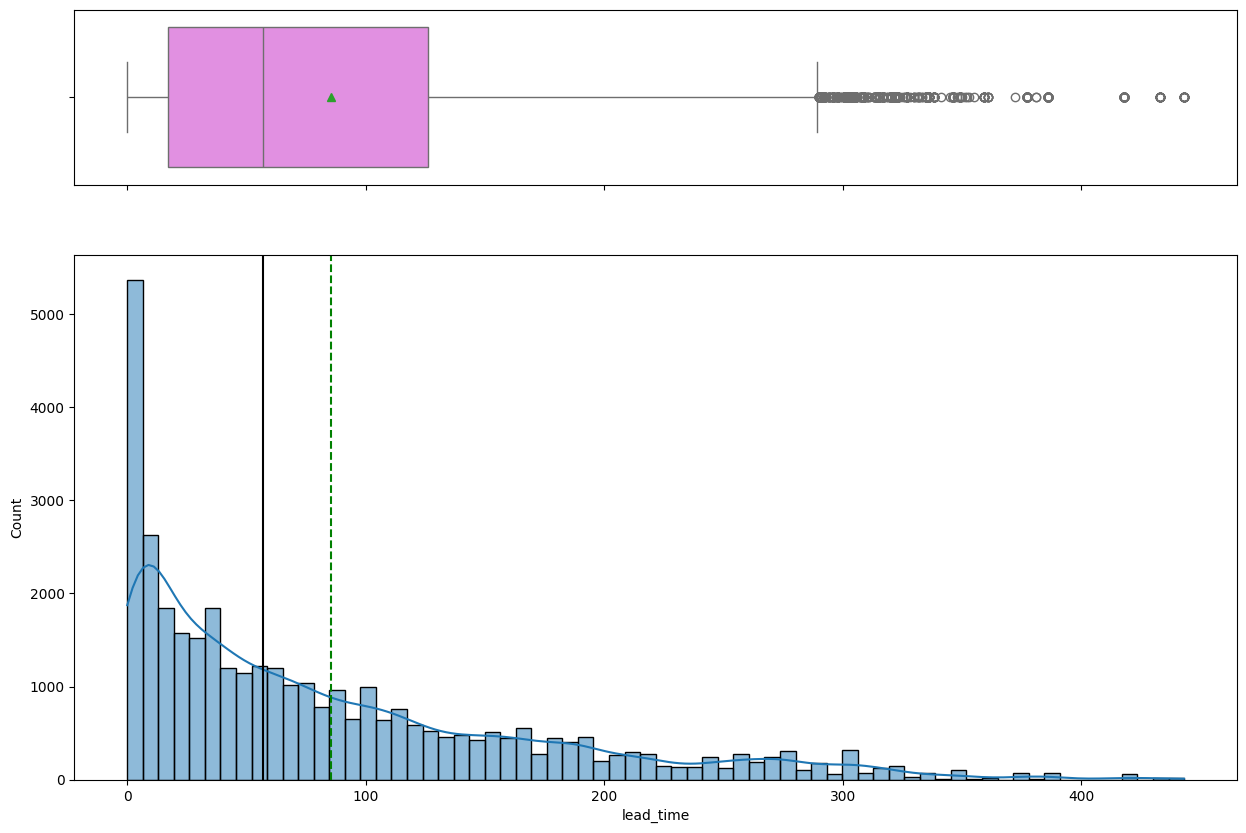

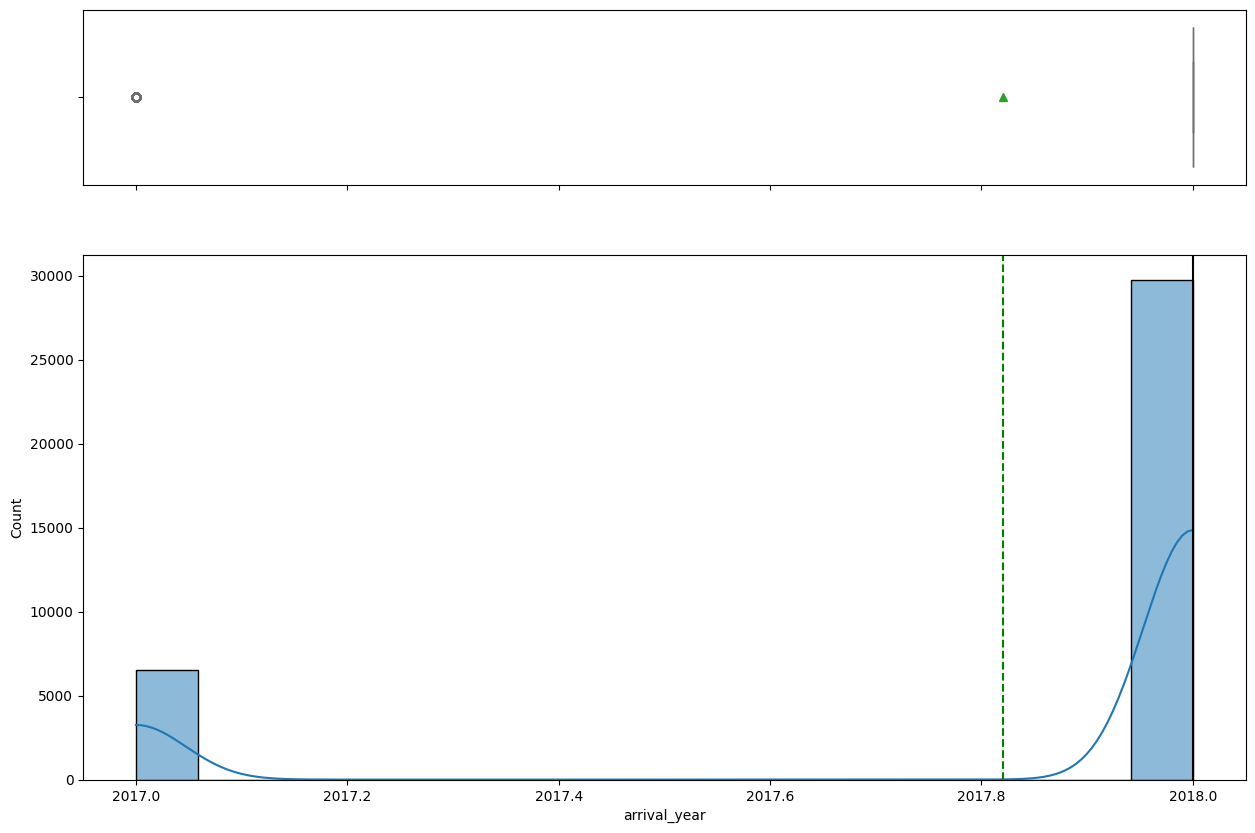

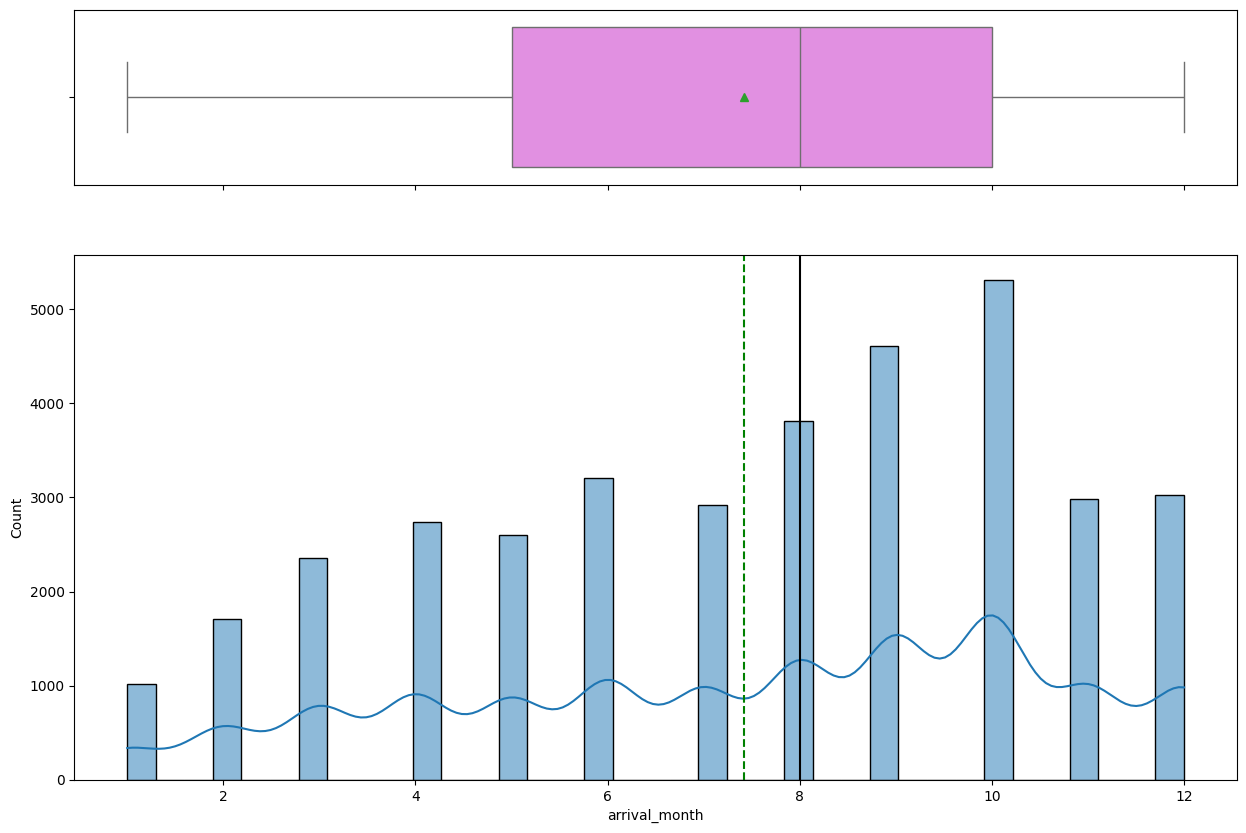

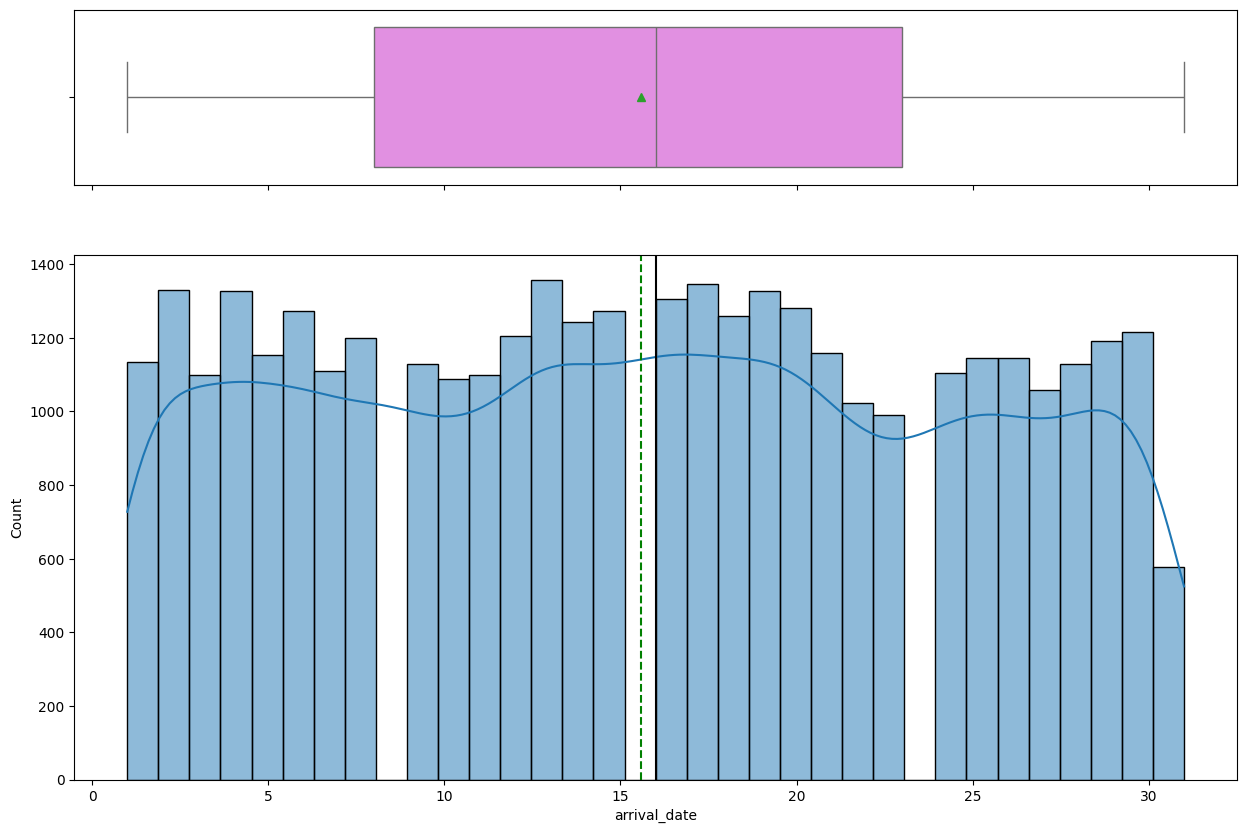

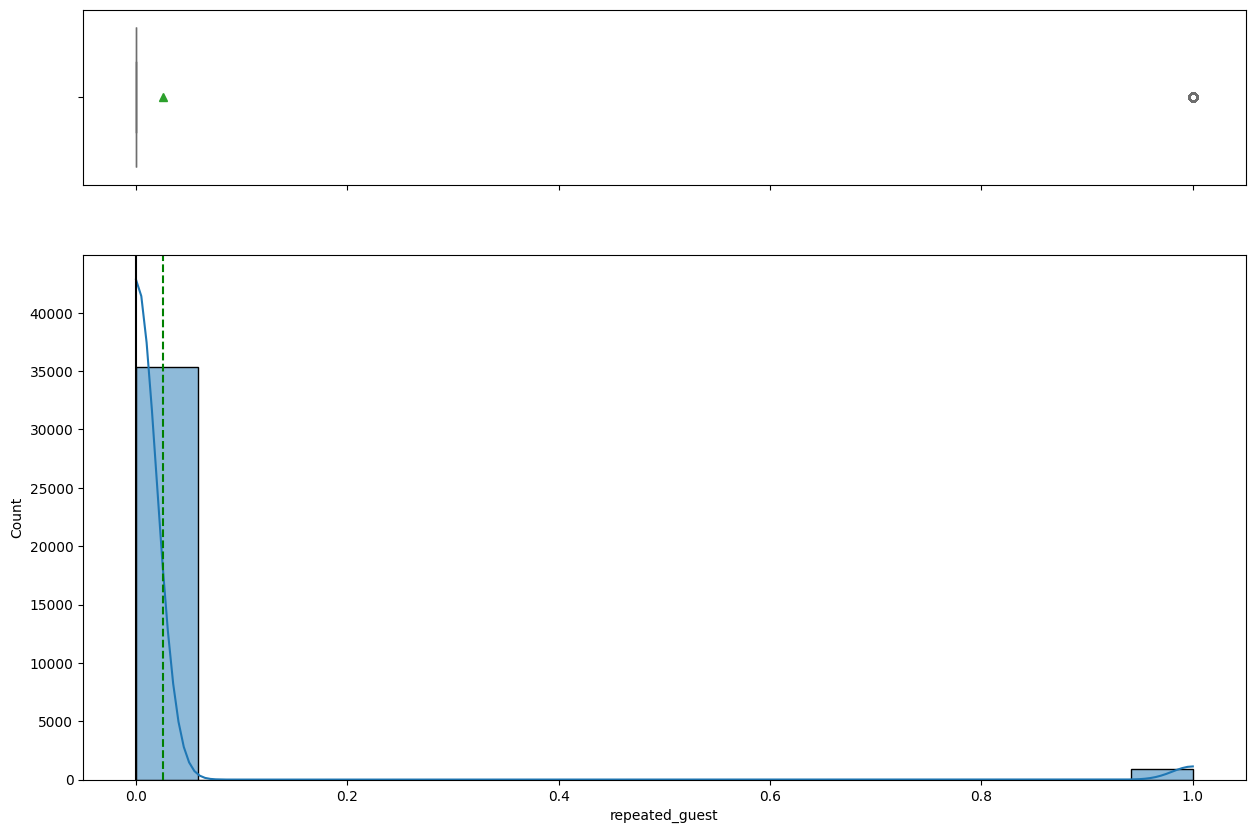

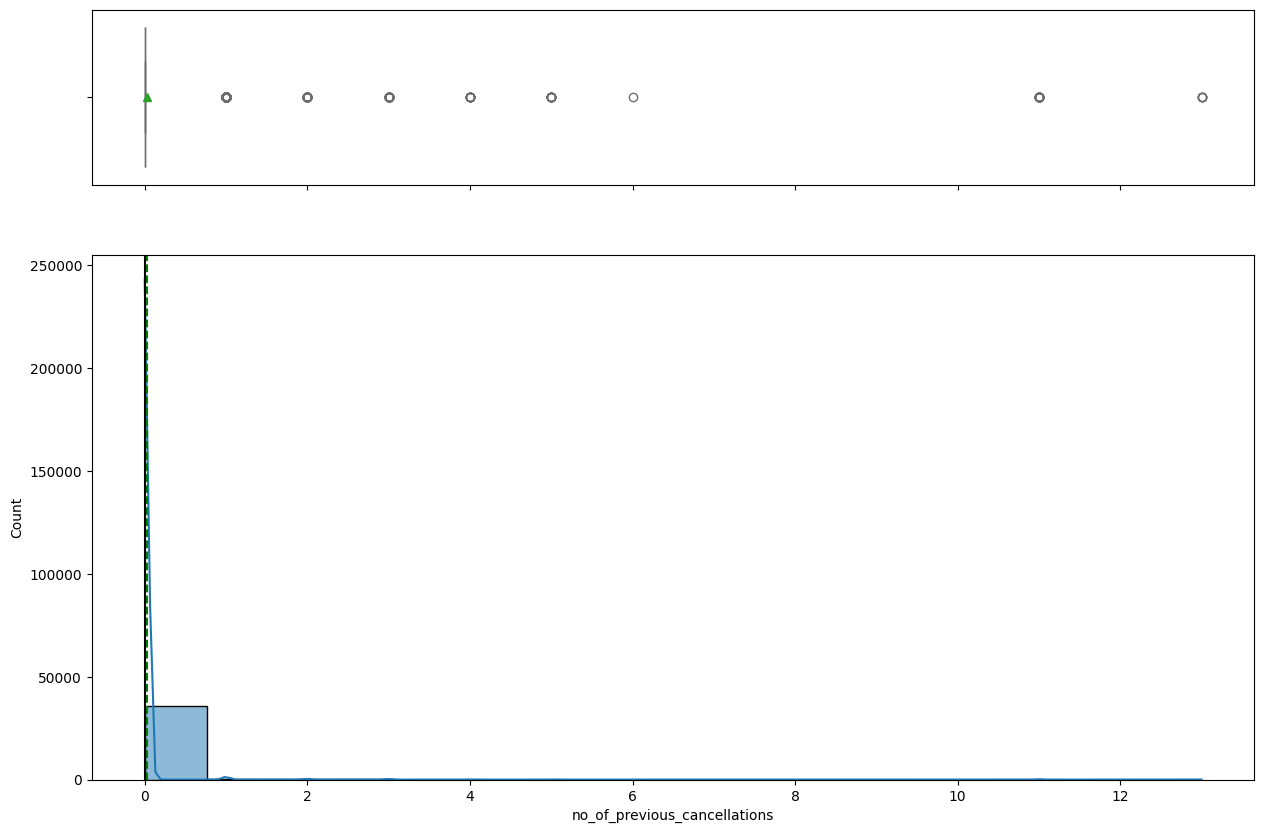

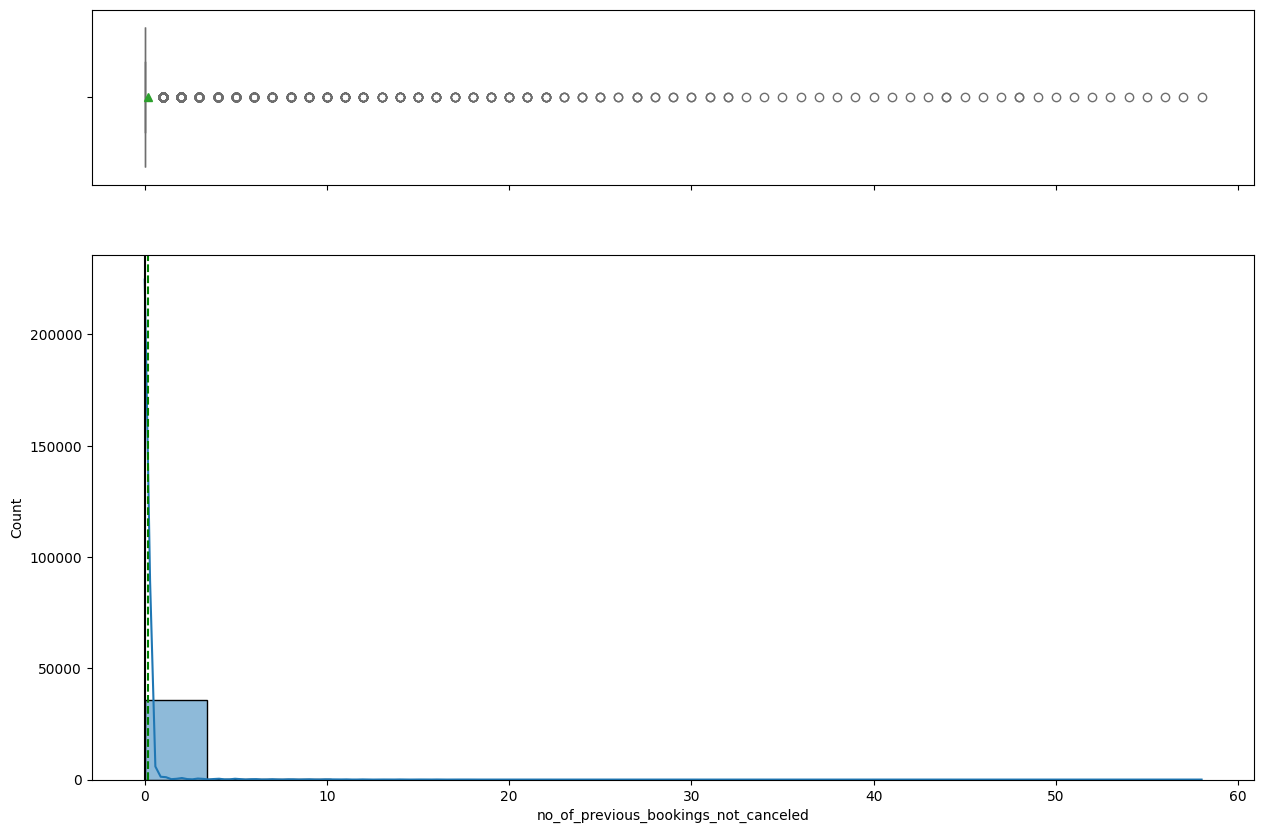

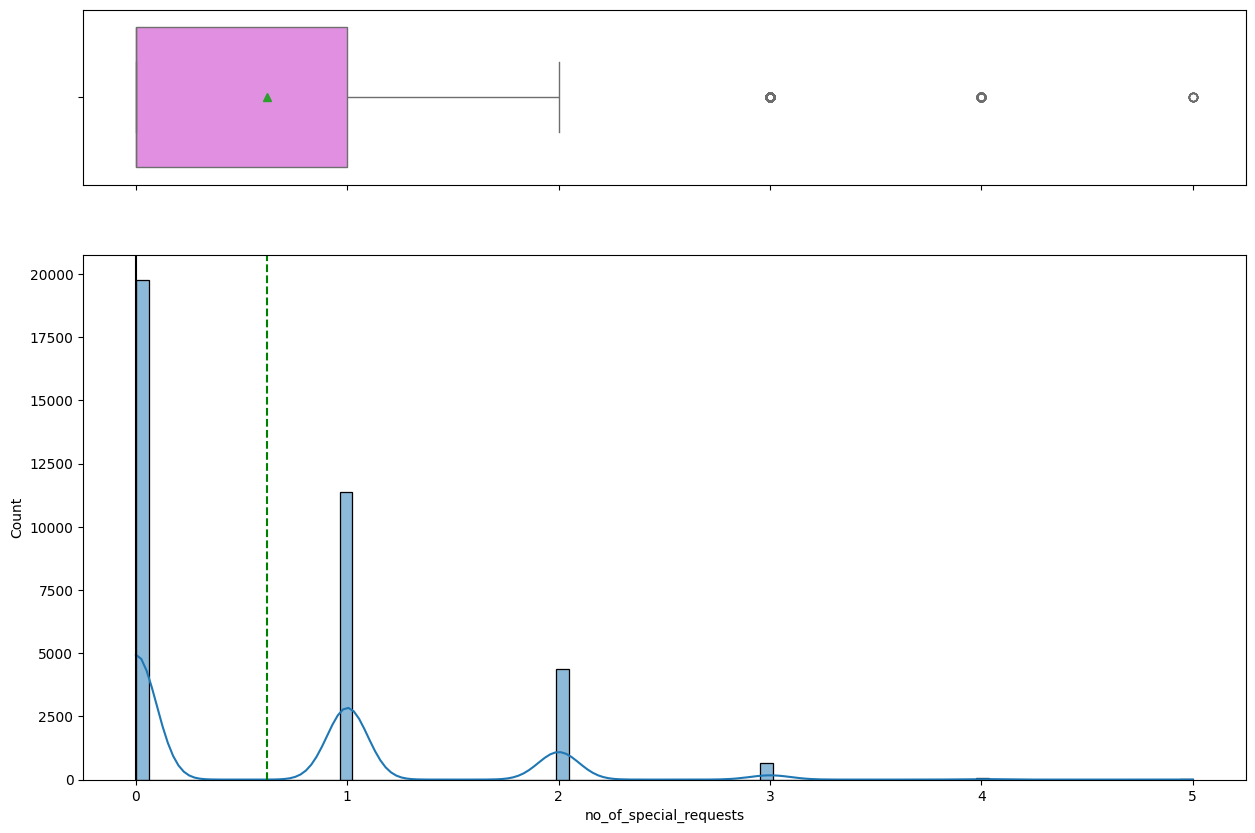

In [ ]:
for i in col:
    histogram_boxplot(df,i)

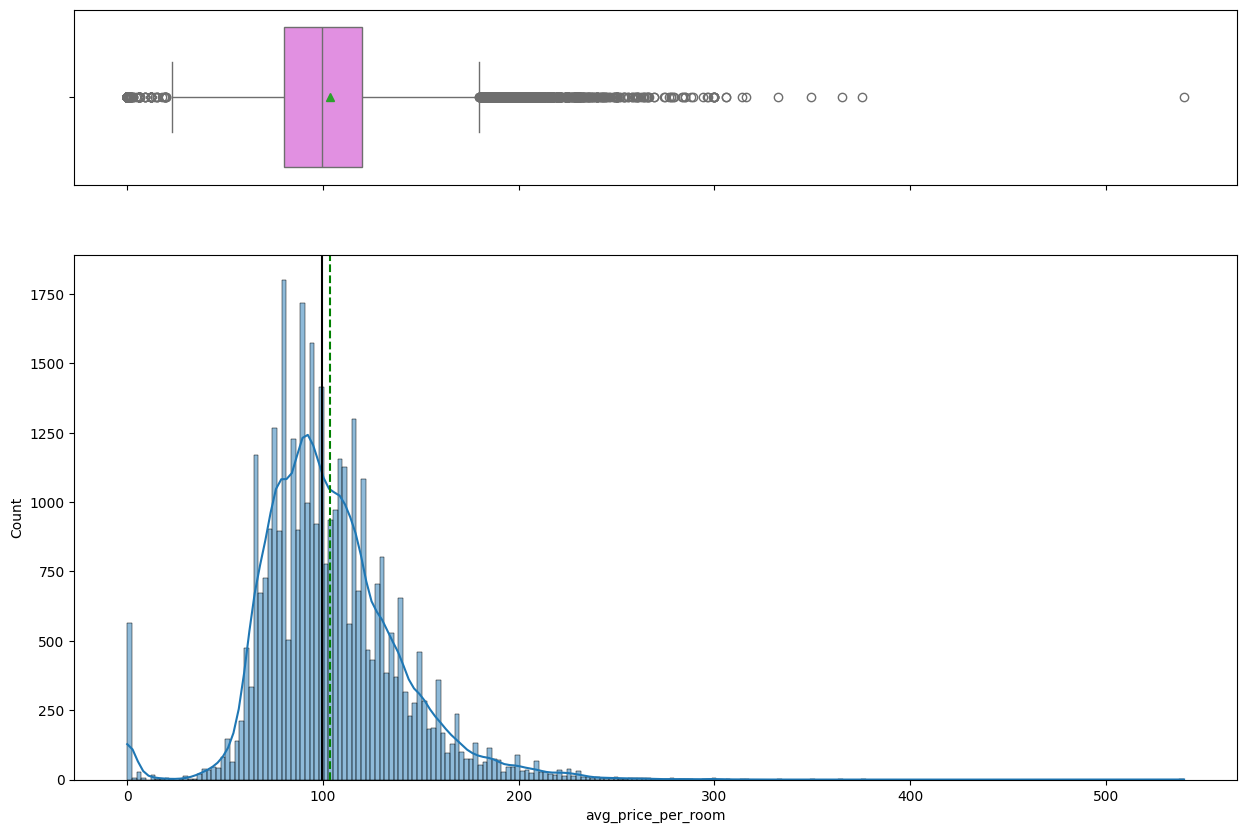

In [ ]:
histogram_boxplot(df,'avg_price_per_room', kde=True)

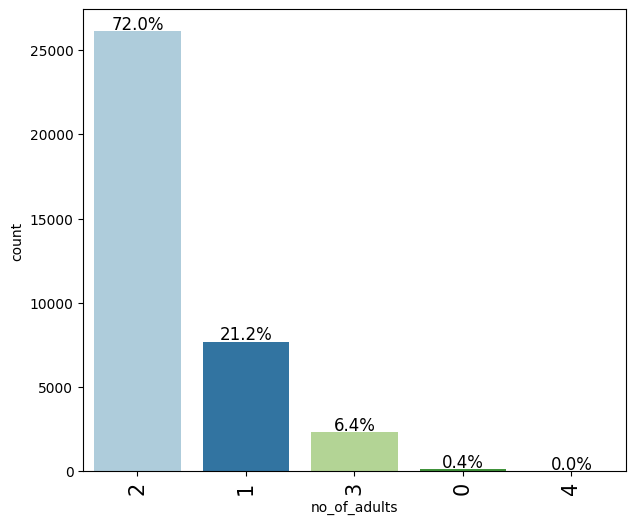

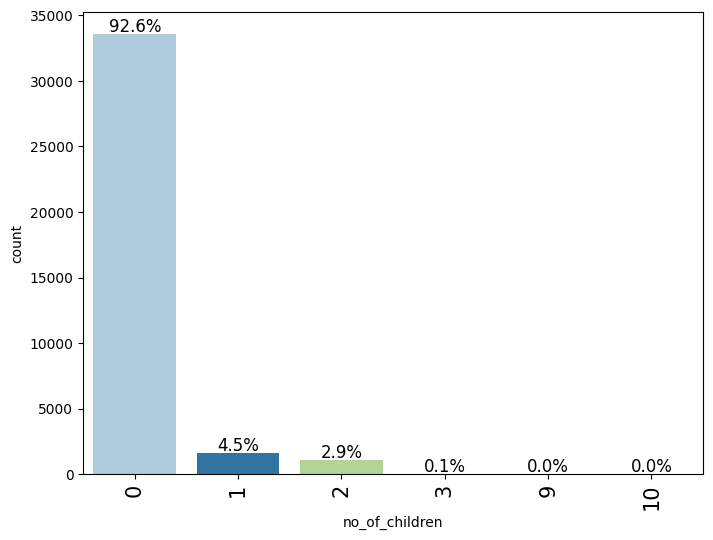

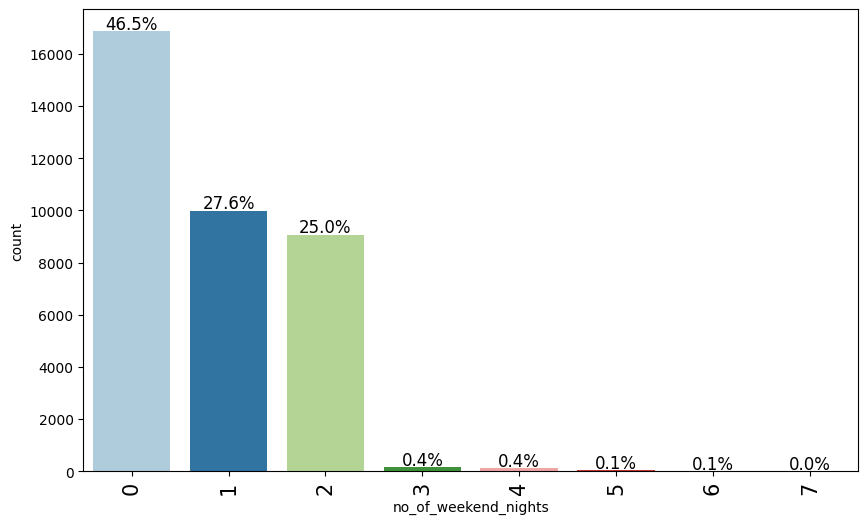

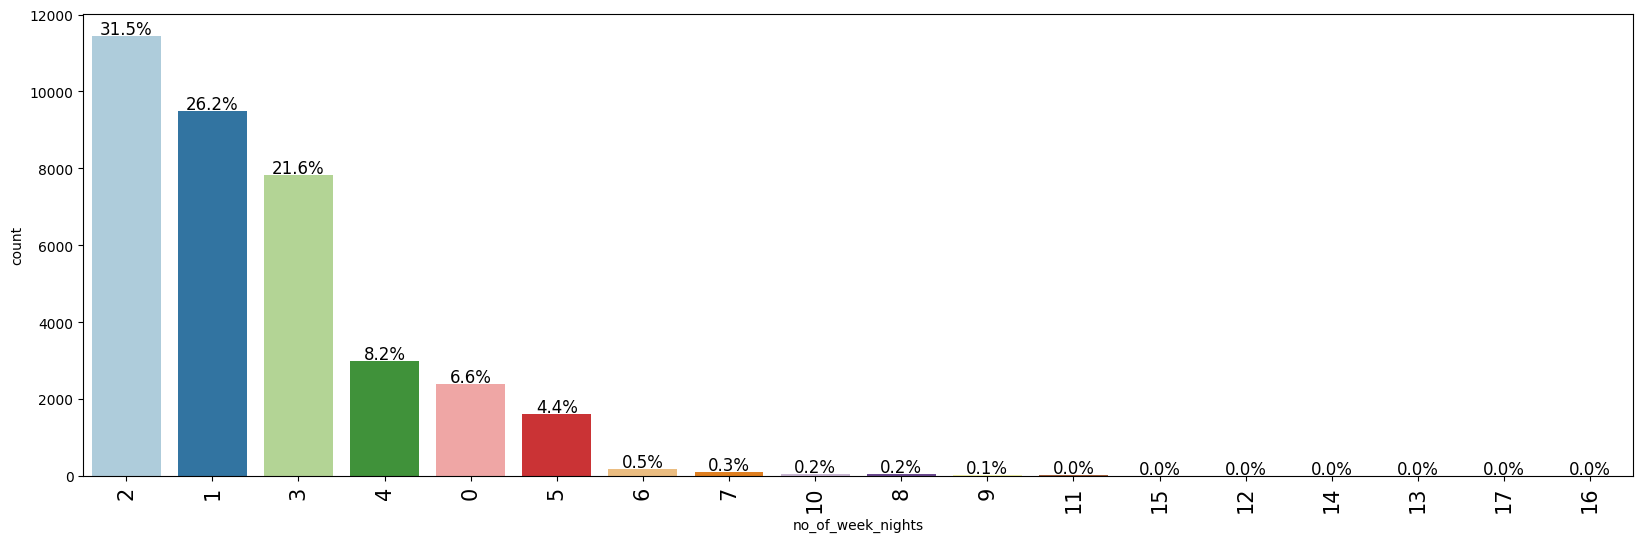

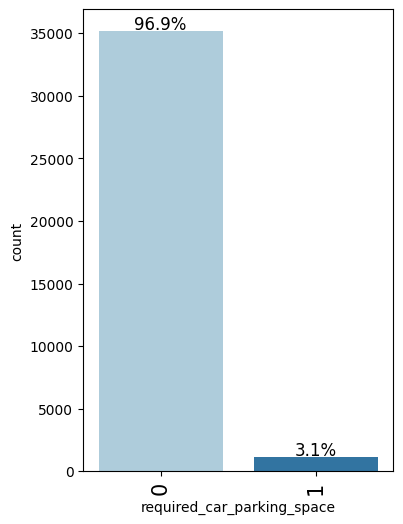

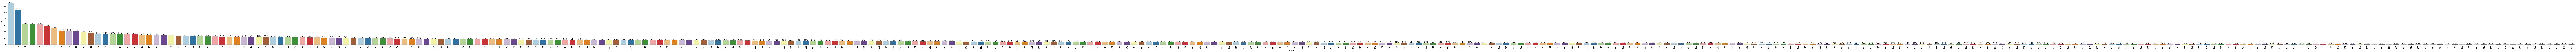

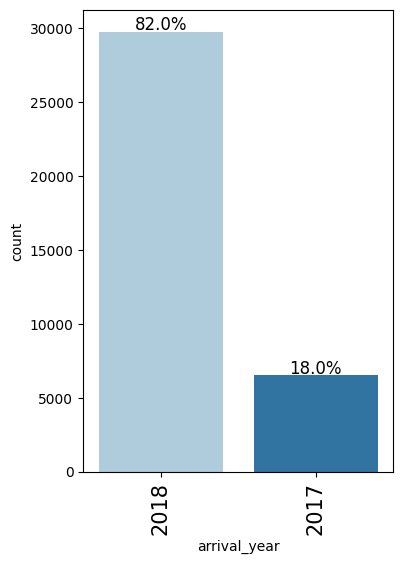

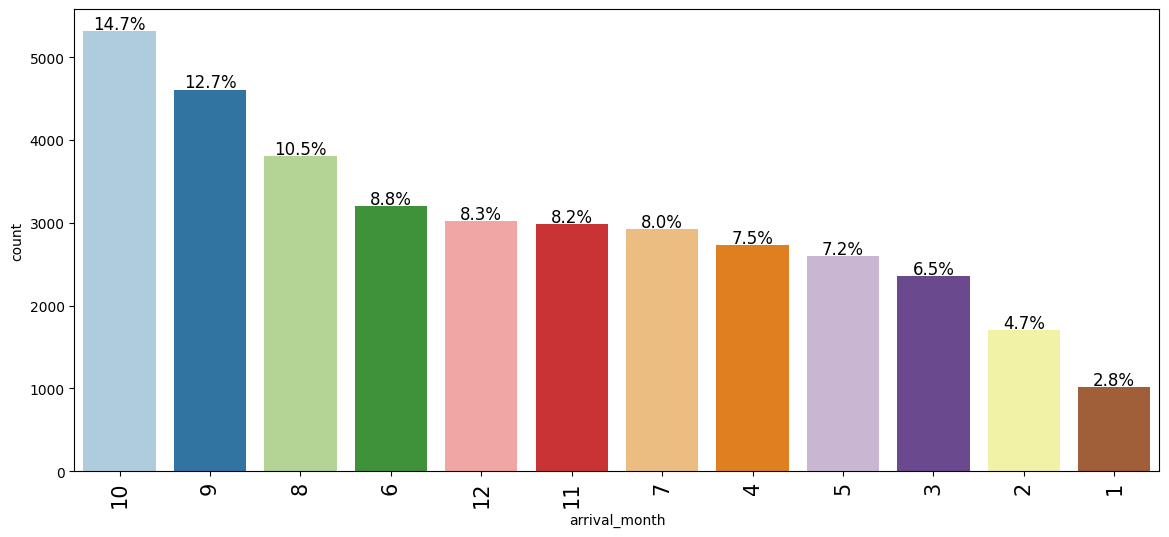

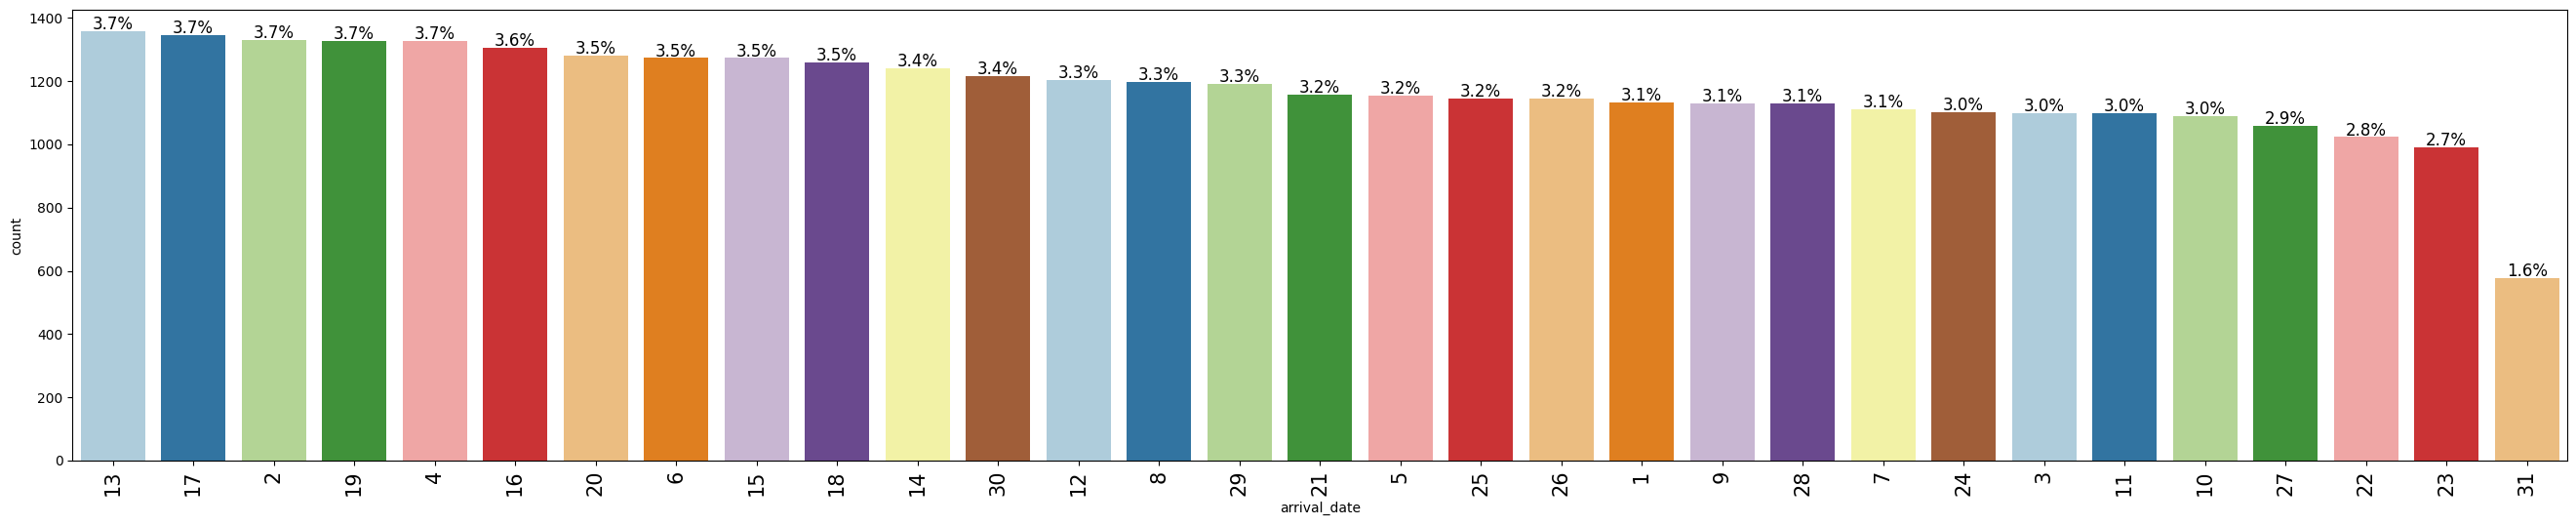

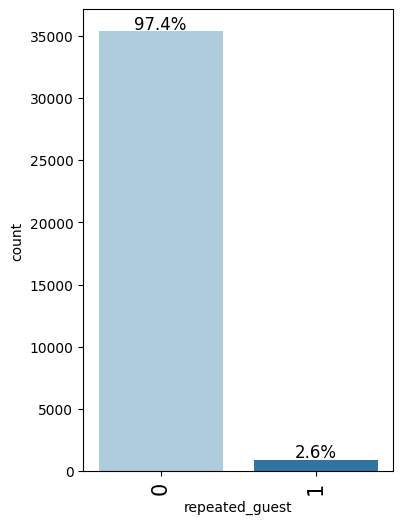

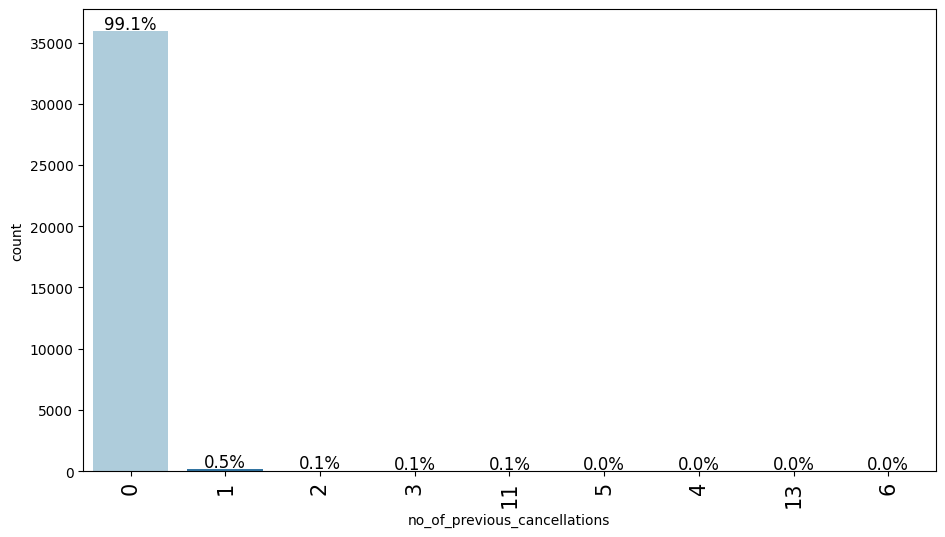

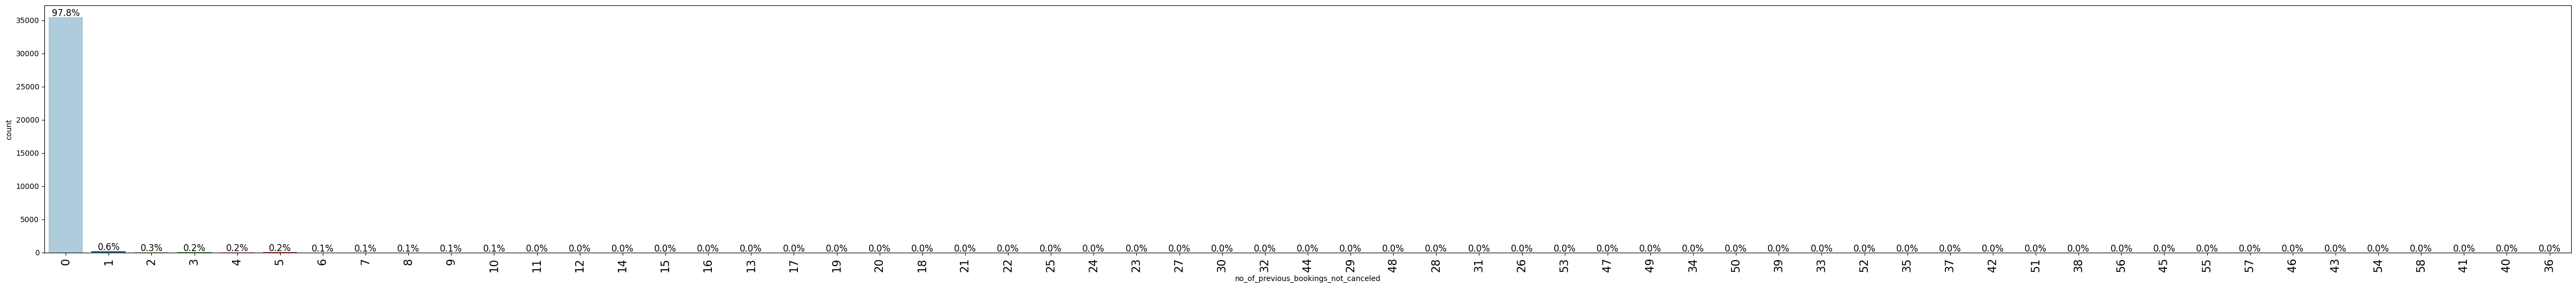

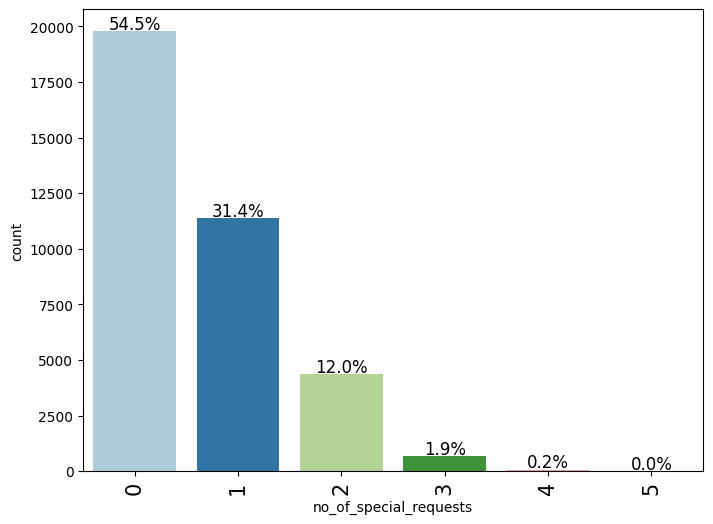

In [ ]:
for i in col:
    labeled_barplot(df,i, perc=True)

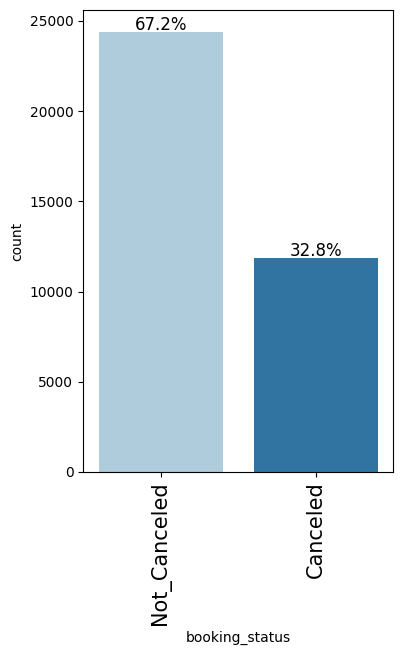

In [ ]:
labeled_barplot(df,'booking_status', perc=True)

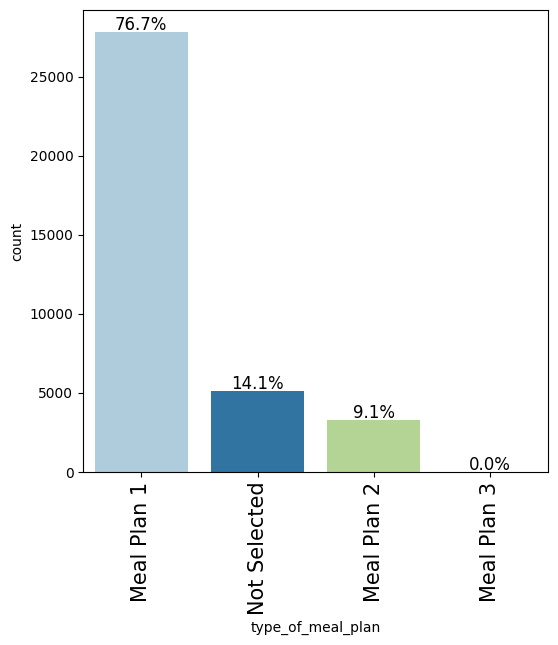

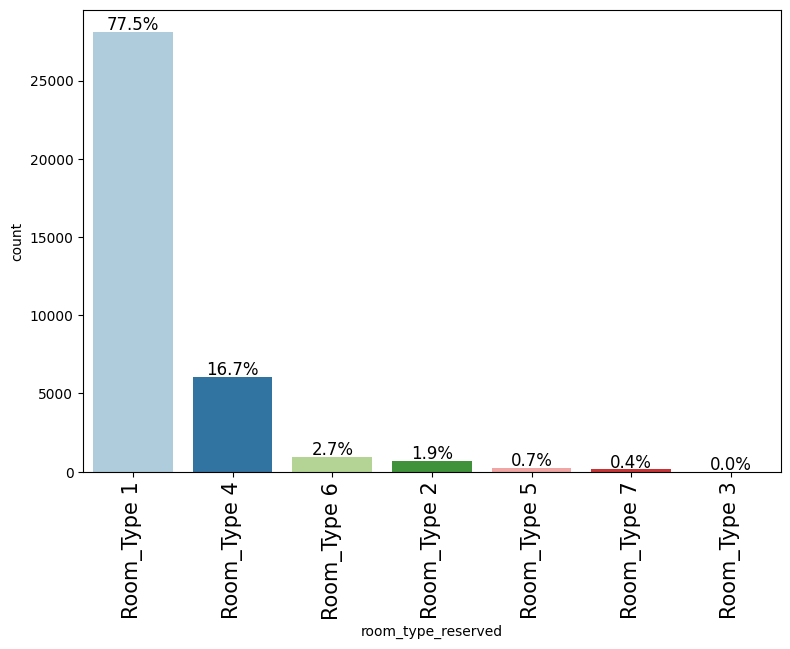

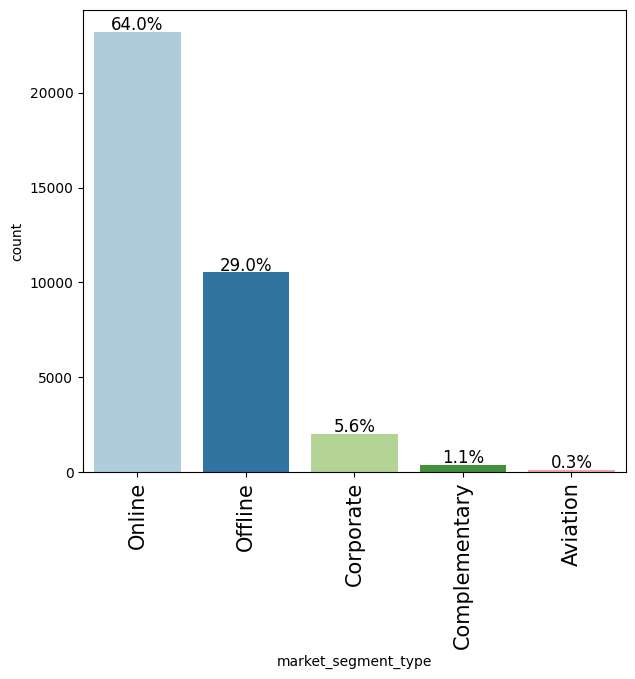

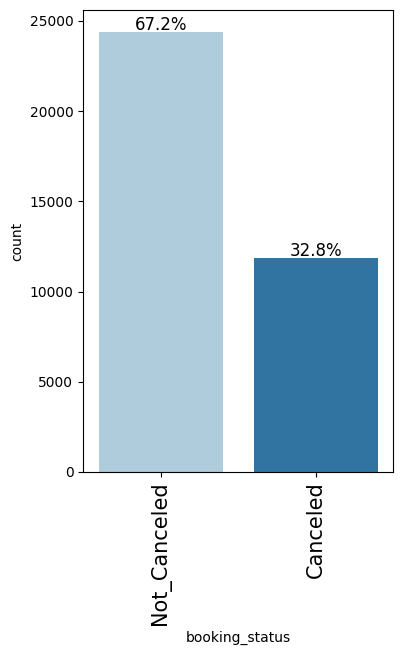

In [ ]:
labeled_barplot(df,'type_of_meal_plan', perc=True)
labeled_barplot(df,'room_type_reserved', perc=True)
labeled_barplot(df,'market_segment_type', perc=True)
labeled_barplot(df,'booking_status', perc=True)

**Observations**

1. 2 adults per room who stay at hotel consists of 72% of the data. 21.2% shows that one adult stay per room and 6.4% shows that 3 adults stay in one room.
2. 92.6% data shows that 0 children stay at hotel; 4.5% represents 1 children stay at hotel and 2.9% shows 2 children stay at hotel.
3. 46.5% people donot prefer to spend night during weekend; 27.6% spend 1 weekend night and 25% spend 2 weekend nights.
4. 31.5% guests spend 2 week nights; 26.2% spend 1 week night while 21.6% spend 3 week nights.
5. 96.9% guests donot require car parking space and 3.1% require car parking space.
6. 82% guests arrive in 2018 year and 18% in 2017.
7. 14.7% guests prefer to stay at hotel in October; 12.7% prefer to stay in September; 10.5% prefer to stay in August; 8.8% prefer to stay in June while the least preferred month is January and most perferred month is October.
8. 3.7% guests arrive on 13, 17, 2, 4 or 19 of a month and least prefer to arrive on 31st.
9. 97.4% guests donot visit again to stay at hotel while 2.6% guests visit again to stay at hotel.
10. 99.1% repesents guests customers have cancelled the booking prior to current booking.
11. 54.5% donot require special request; 31.4% require only 1 special request while 12% require 2 special request.
12. 67.2% has cancelled the booking while 32.8% have not cancelled the booking.
13. 76.7% guests prefer only breakfast; 14.1% have not selected any meal plan; 9.1% like breakfast and one other meal and none of guests prefer full board which meal plan 3.
14. 77.5% guets like room type 1; 16.7% like room type 4 and none of guests like room type 3.
15. 64% guests prefer online as market segment; 29% prefer offline as market segment.
16. 67.2% guests have not canceled the booking and 32.8% have canceled the booking.

**Bivariate Analysis**

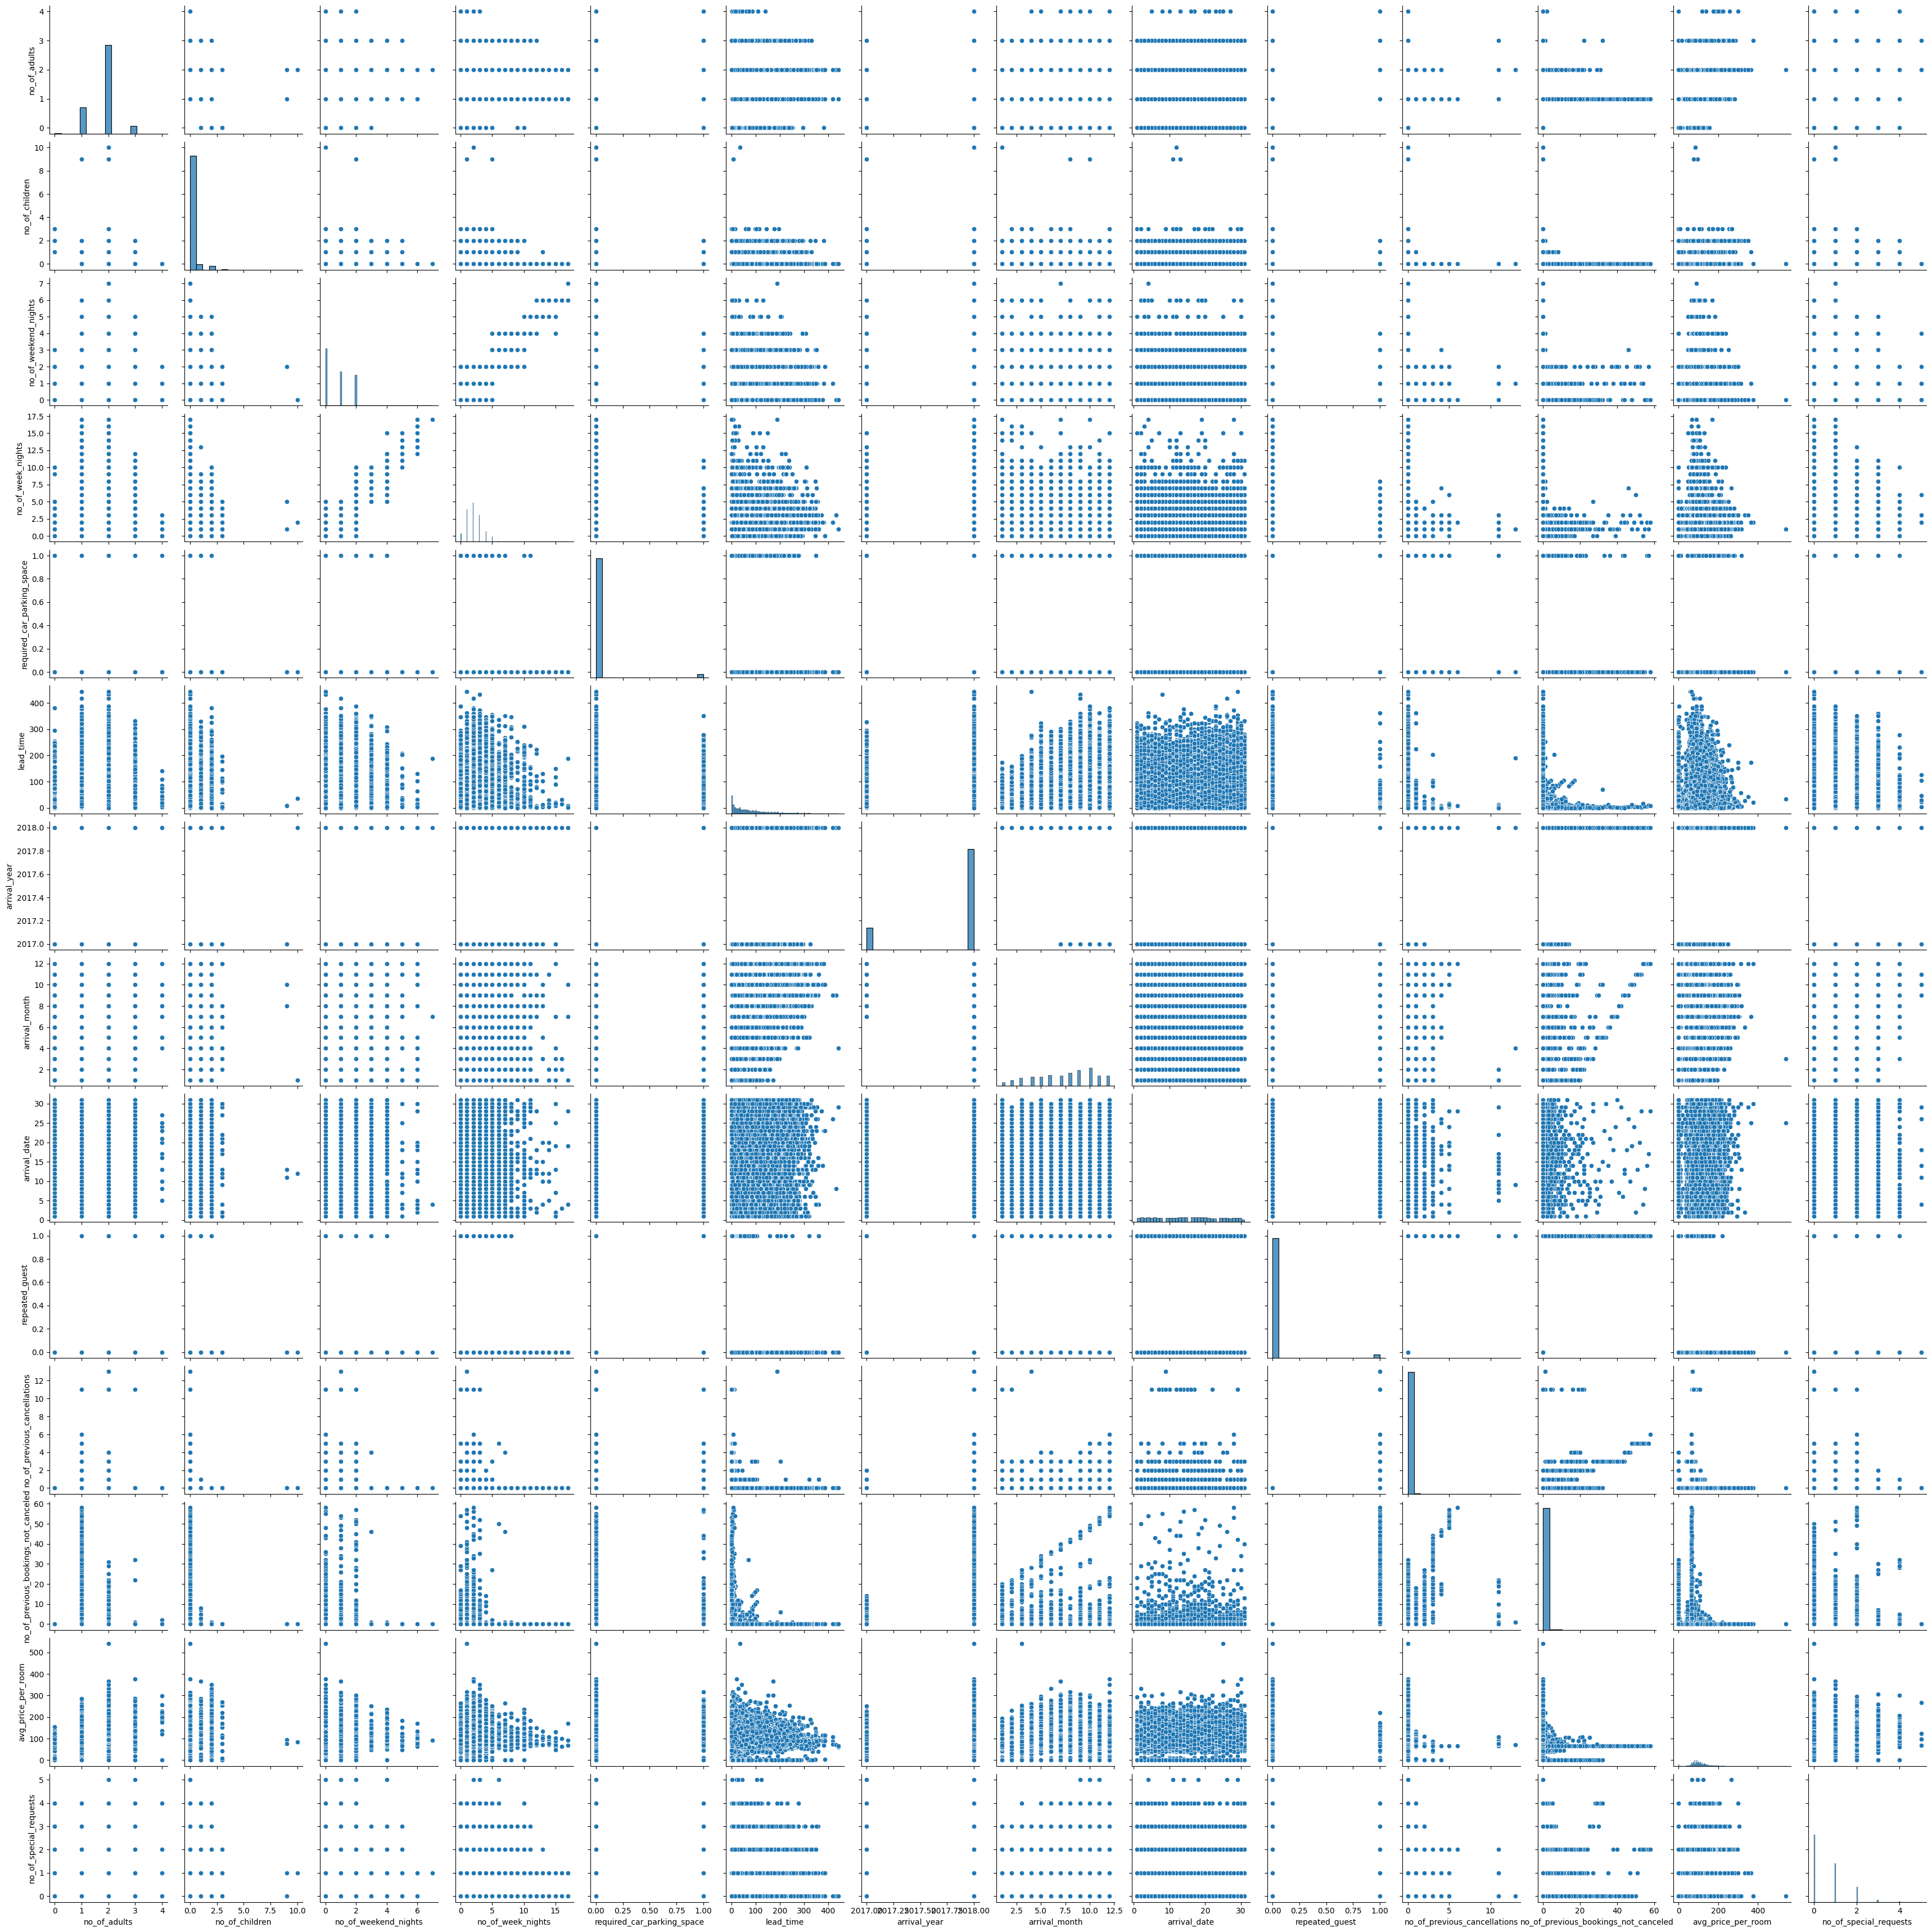

In [ ]:
sns.pairplot(df)
figsize=(15,10)
plt.show()

In [ ]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Axes: xlabel='arrival_month', ylabel='count'>

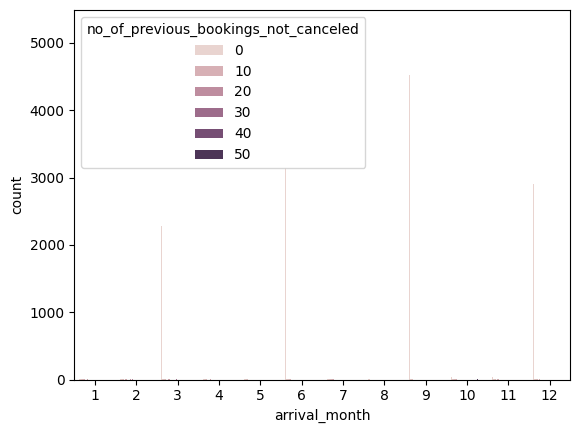

In [ ]:
sns.countplot(df,x='arrival_month', hue='no_of_previous_bookings_not_canceled')

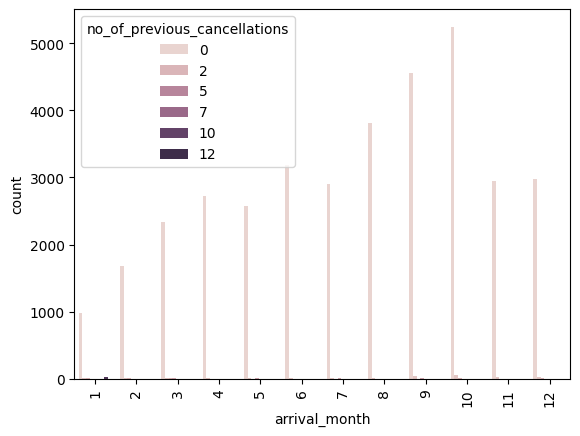

In [ ]:
sns.countplot(df,x='arrival_month', hue='no_of_previous_cancellations')
plt.xticks(rotation=90)
plt.show()

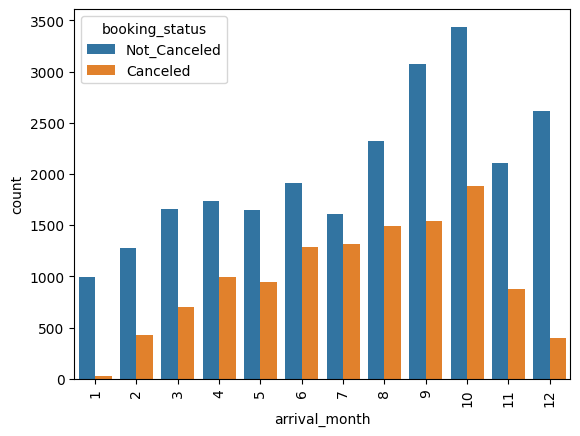

In [ ]:
sns.countplot(df, x='arrival_month', hue='booking_status')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.arrival_month.value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64


**Observation**

This shows October is the busiest month in the hotel. Second busiest month is September.

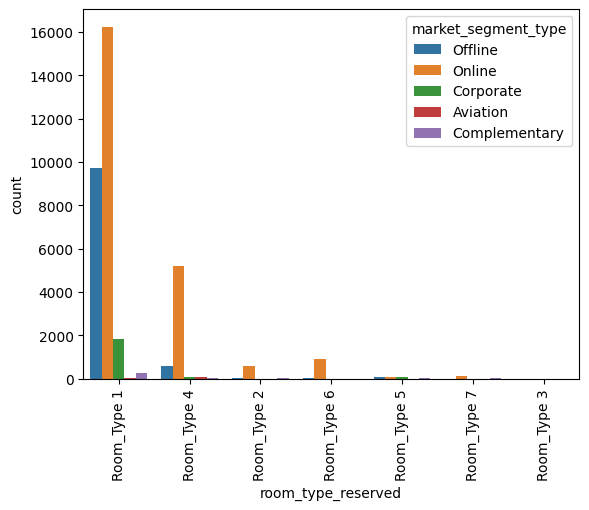

In [ ]:
sns.countplot(df, x='room_type_reserved', hue='market_segment_type')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='required_car_parking_space', ylabel='count'>

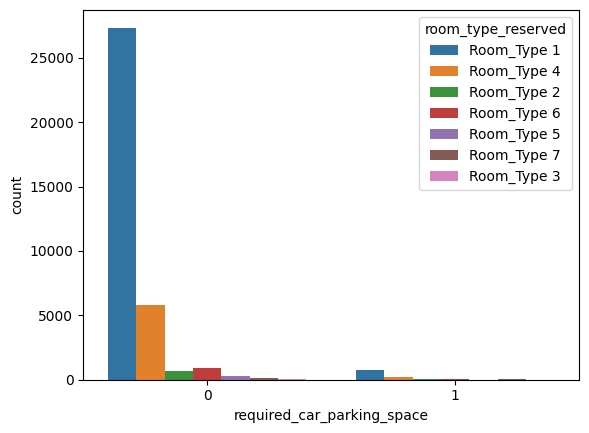

In [ ]:
sns.countplot(df,x='required_car_parking_space', hue='room_type_reserved')

In [ ]:
df.no_of_children.value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [ ]:
df.no_of_adults.value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

<Axes: xlabel='no_of_adults', ylabel='count'>

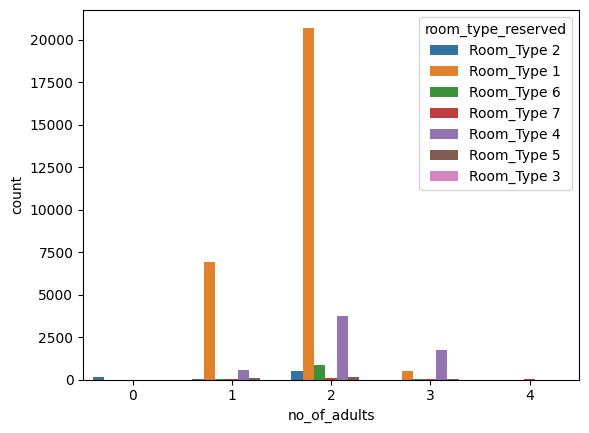

In [ ]:
sns.countplot(df, x='no_of_adults', hue='room_type_reserved')

<Axes: xlabel='no_of_adults', ylabel='count'>

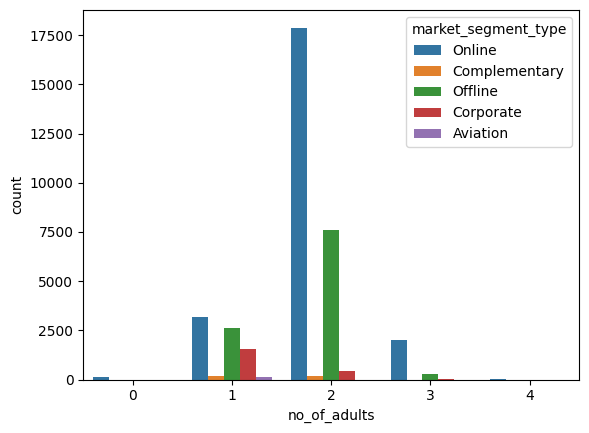

In [ ]:
sns.countplot(df,x='no_of_adults', hue='market_segment_type')

<Axes: xlabel='no_of_adults', ylabel='count'>

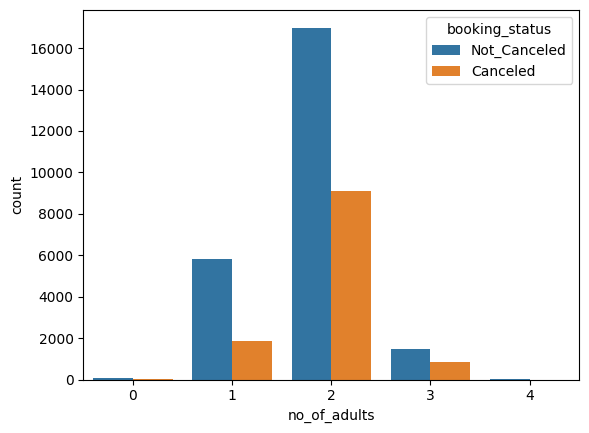

In [ ]:
sns.countplot(df, x='no_of_adults', hue='booking_status')

<Axes: xlabel='no_of_adults', ylabel='count'>

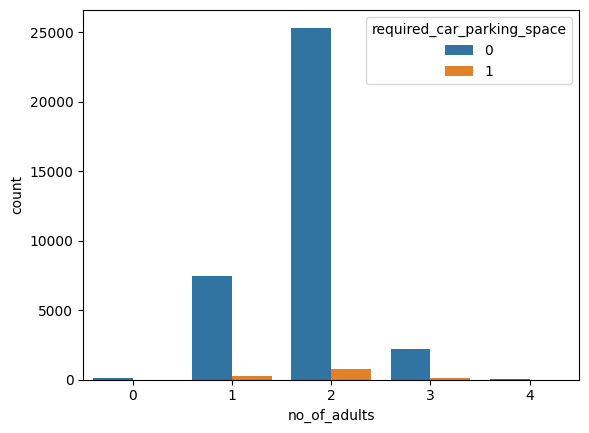

In [ ]:
sns.countplot(df, x='no_of_adults', hue='required_car_parking_space')

<Axes: xlabel='no_of_adults', ylabel='count'>

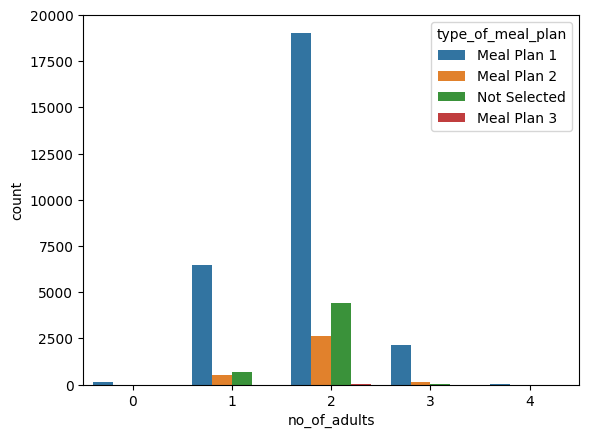

In [ ]:
sns.countplot(df, x='no_of_adults', hue='type_of_meal_plan')

<Axes: xlabel='no_of_children', ylabel='count'>

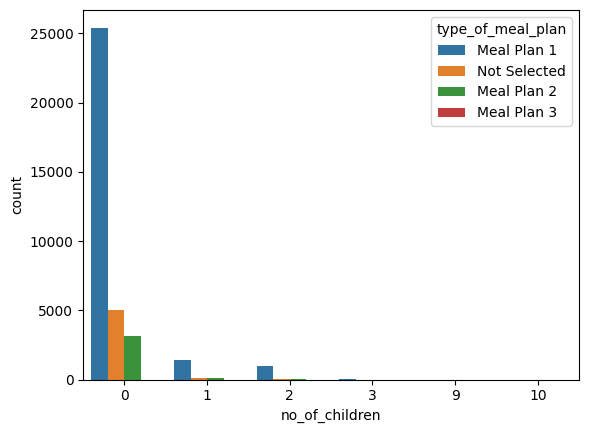

In [ ]:
sns.countplot(df, x='no_of_children', hue='type_of_meal_plan')

In [ ]:
df.market_segment_type.value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


**Observation**

Mostly guests come frm online as market segment type.

In [ ]:
df.booking_status.value_counts(normalize=True)

booking_status
Not_Canceled   0.67236
Canceled       0.32764
Name: proportion, dtype: float64

<Axes: xlabel='market_segment_type', ylabel='count'>

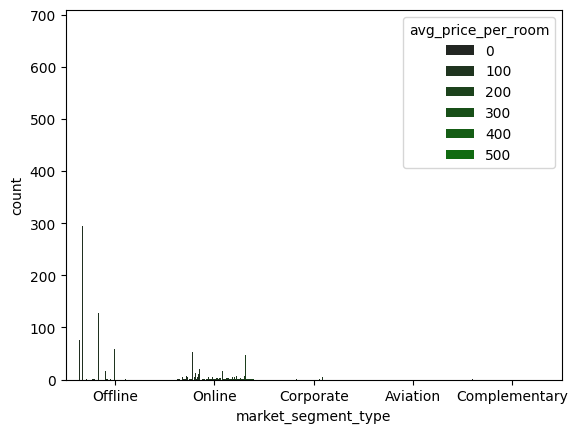

In [ ]:
sns.countplot(df,x='market_segment_type', hue='avg_price_per_room',color='green')

<Axes: xlabel='booking_status', ylabel='count'>

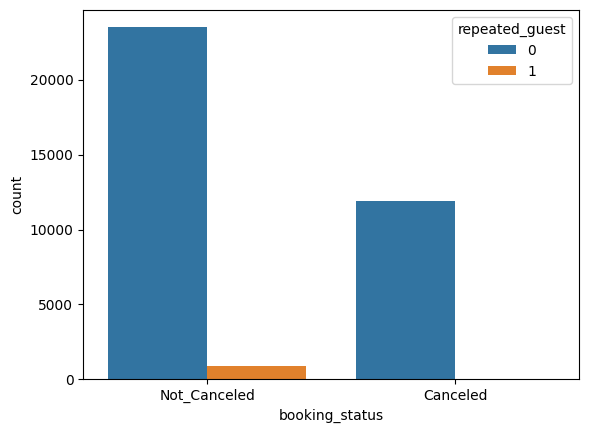

In [ ]:
sns.countplot(df,x='booking_status', hue='repeated_guest')

In [ ]:
df[df['repeated_guest']==1]['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled   0.98280
Canceled       0.01720
Name: proportion, dtype: float64

**Observation**

1.72% repeated guests have cancelled the booking.

In [ ]:
df.booking_status.value_counts(normalize=True)

booking_status
Not_Canceled   0.67236
Canceled       0.32764
Name: proportion, dtype: float64

**Observation**

32.76% bookings are cancelled and 67.23% bookings are not cancelled.

<Axes: xlabel='booking_status', ylabel='count'>

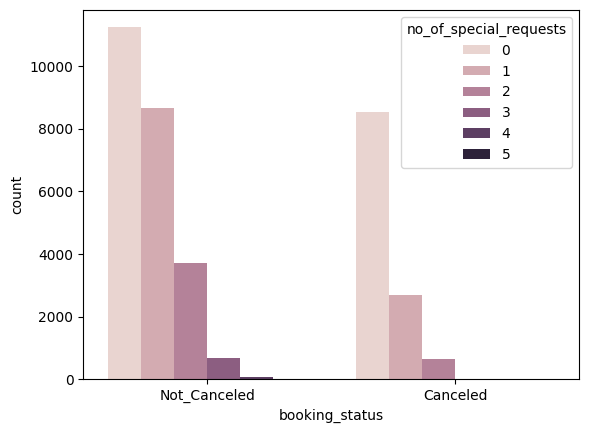

In [ ]:
sns.countplot(df,x='booking_status', hue='no_of_special_requests')

In [ ]:
df.groupby('booking_status')['no_of_special_requests'].value_counts()

booking_status  no_of_special_requests
Canceled        0                          8545
                1                          2703
                2                           637
Not_Canceled    0                         11232
                1                          8670
                2                          3727
                3                           675
                4                            78
                5                             8
Name: count, dtype: int64

**Observation**

As from the above value counts, we can see there is no effect of booking cancellation on no of special request.

In [ ]:
df.groupby('market_segment_type')['avg_price_per_room'].mean()

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64

**Observation**

Online market segment has highest mean with second highest mean of Aviation market segment.

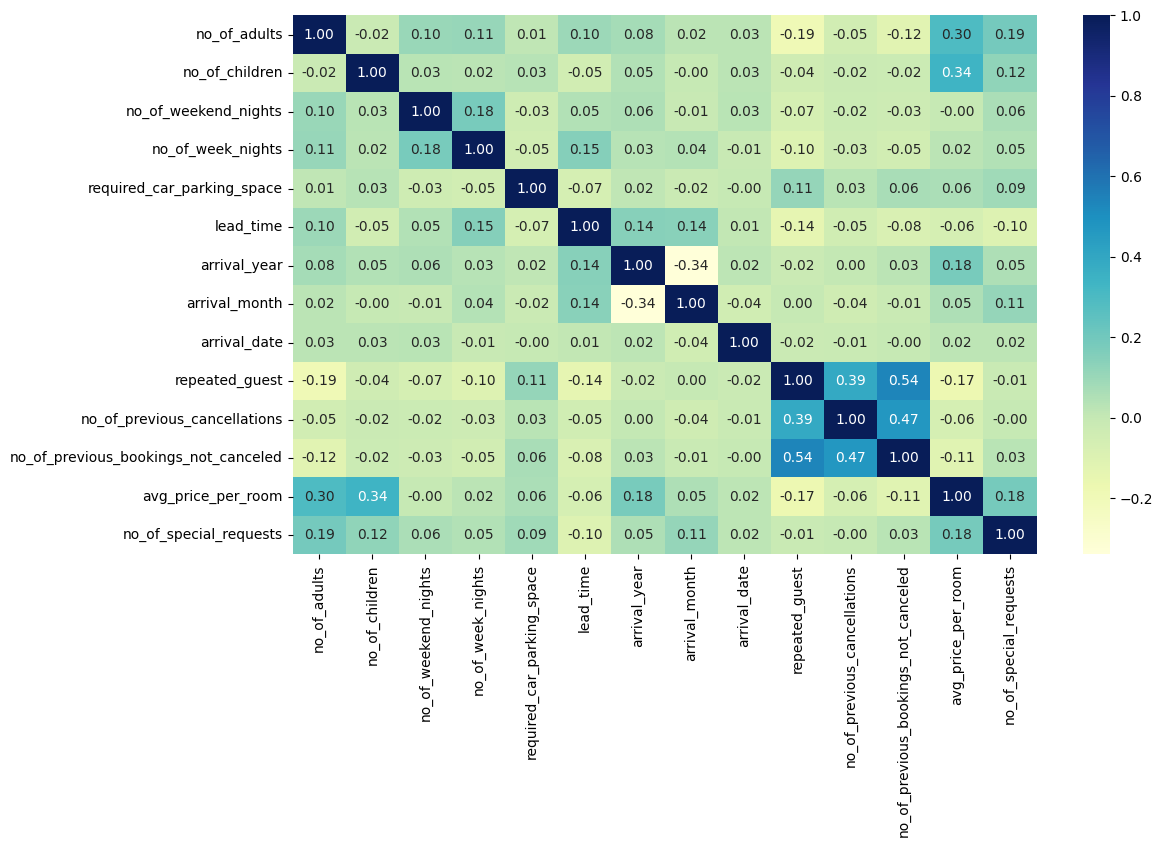

In [ ]:
col_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[col_list].corr(), annot=True, cmap="YlGnBu", fmt=".2f"
)
plt.show()

**Observations**

1. Approximately 3500 guests who have booked in october has not cancelled the booking while 1800 have cancelled it for October,
2. Approximately 3000 guests for booking in Sepetember have not cancelled the booking while 1500 have cancelled it.
3. 1600 people who prefer room type 1 has online as market segment 9800 as offline market segment and 1800 as corporate as market segment.
4. 5700 guests who prefer romme type 4 has online as market segment.
5. Approximately 22000 who book room type 1 and 5000 who book room type 4 donot require car parking space while a small number of guests require car parking space for room type 1.
6. 1618 children per room stay with guests at hotel while 2 children per room stay with guests and 33577 children donot stay with guests.
7. 2 adults stay in one room and totl of 2 guests who stay in one room is 26108 and 7695 stay alone while 2317 stay in one room with each room count guests as 3.
8. No of adults as 2 in one room prefer to stay in room type 1 and also no of adult as 1 prefer to stay in room type 1.
9. No of adults as 2 prefer online as market segment and second preference is offline.
10. Approximately 17000 with no of adults as 2 in each room have not canceled the booking and 8100 have cancelled it; while 6000 with no of adult as 1 in each room have not canceled the booking and 2000 have canceled it.
11. 25000 with no of adults as 2 in each room donot require car parking space and a few only require car parking space.
12. 19000 with no of adults as 2 in each room prefer meal plan 1 and 2500 prefer meal plan 2 and 4000 have not selected; while 6000 with no of adult as 1 in one room prefer meal plan 1.
13. 23214 prefer online as market segment; 10528 prefer offline as market segment and 2017 prefer corporate as market segment.
14. 67.23% have not canceled the booking and 32.76% have canceled the booking.
15. Approximately 23000 who have not repeated the stay have not canceled the booking and 2000 as repeated guests have not canceled it. On the other hand, 11000 with not as repeated guests have canceled the booking.
16. 11500 donot reuire special request and these are guests who have not canceled the booking; 8200 require 1 special request who have not canceled the booking and 3900 require 2 special request who have not canceled the booking. On the other hand, 8100 donot require special request who have canceled the booking; 2200 require special request who have canceled the booking and 700 require 2 special require special request who have canceled the booking.
17.5317 guests prefer to visit in October month while 4611 prefer to vsit in September month.
18. Heat map does not show any positive relationship between two columns.

**Data Preprocessing**

Missing value treatment (if needed)

Feature engineering (if needed)

Outlier detection and treatment (if needed)

Preparing data for modeling

Any other preprocessing steps (if needed)

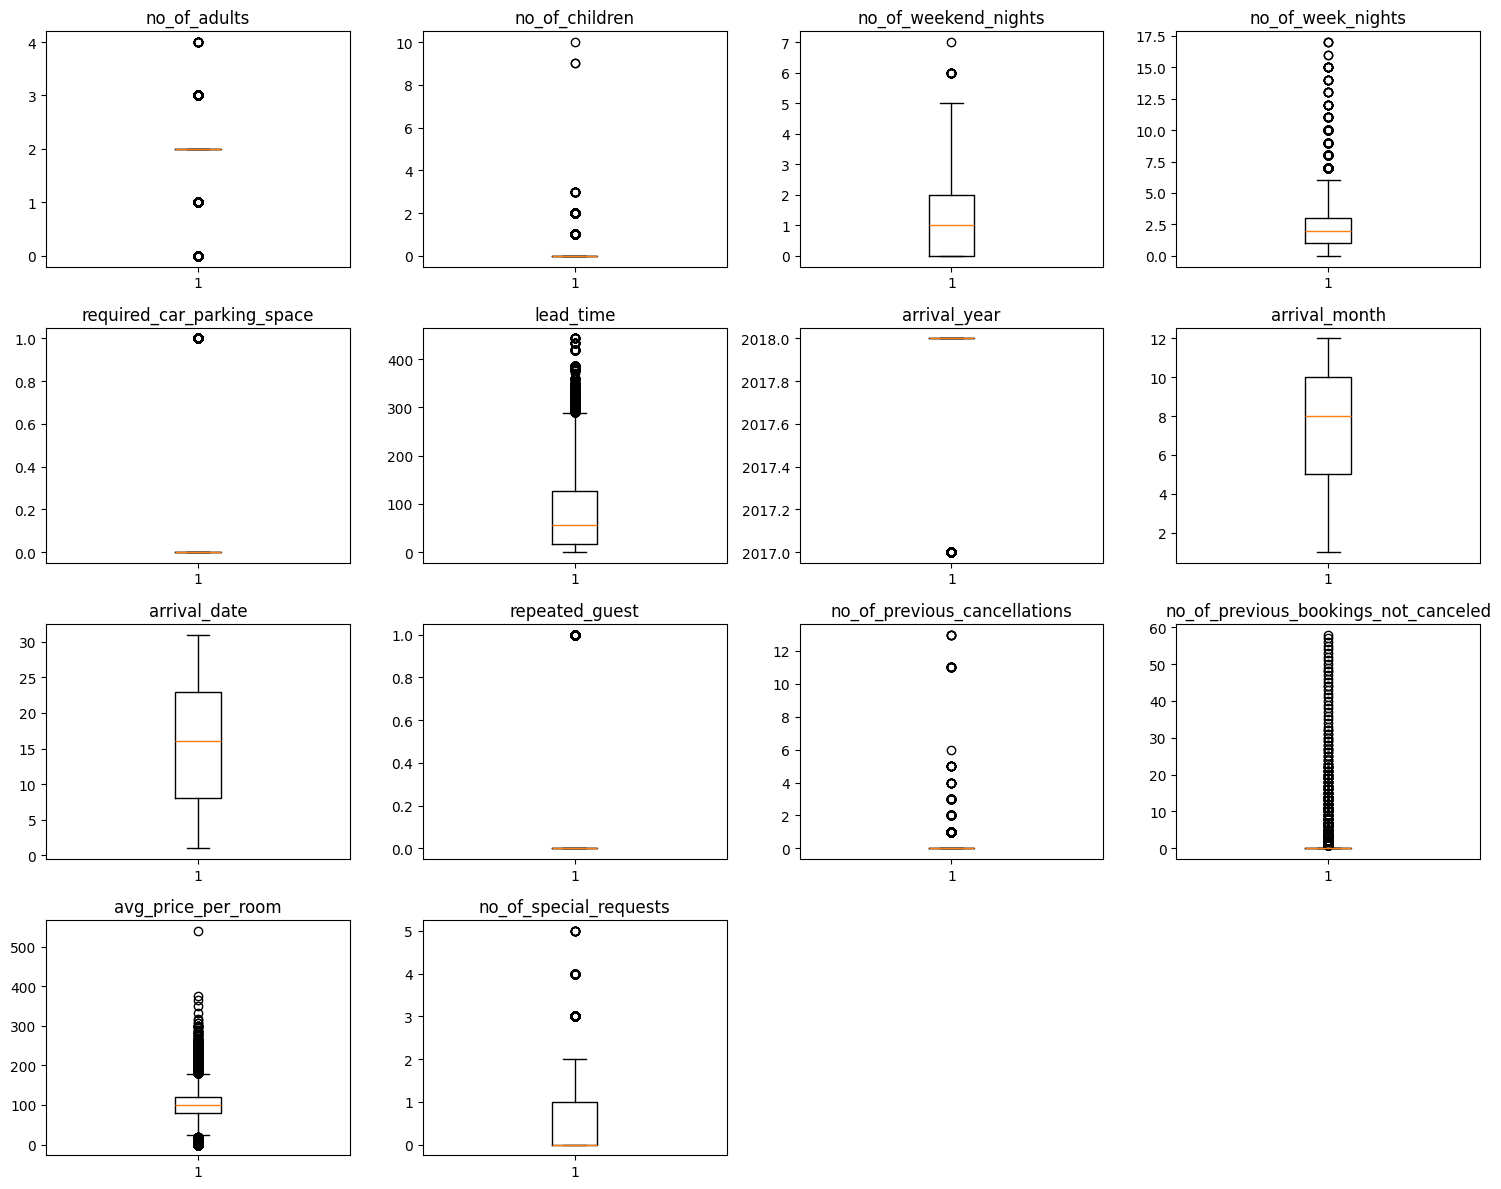

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(col_list):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

There are missing values but we will not treat it as these are genuine values

**EDA**

It is a good idea to explore the data once again after manipulating it.

**Model Preparation**

In [ ]:
df['booking_status']=df['booking_status'].apply(lambda X: 1 if X=='Canceled' else 0)

In [ ]:
X=df.drop('booking_status', axis=1)
y=df['booking_status']
print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
X=sm.add_constant(X)

In [ ]:
X=pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Number of rows in  x train set:', X_train.shape[0])
print('Number of rows in x test set:',X_test.shape[0])
print('Number of rows in y train set:',y_train.shape[0])
print('Number of rows in y test set:',y_test.shape[0])

Number of rows in  x train set: 25392
Number of rows in x test set: 10883
Number of rows in y train set: 25392
Number of rows in y test set: 10883


In [ ]:
X_train=X_train.astype(float)
y_train=y_train.astype(float)

**Model Building**

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.3273
Time:                        01:19:03   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -836.8666    120.105     -6.968      0.000   -1072.268    -601.465
no_of_adults                             0.1216      

**Observations**

Negative values of the coefficient show that the probability of a person cancelling booking decreases with the increase of the corresponding attribute value.

Positive values of the coefficient show that the probability of a person cancelling booking increases with the increase of the corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

**Model evaluation**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Model can make wrong predictions as:**

1. Predicting a person has cancelled the booking but in reality person has not cancelled.

2. Predicting a person doesn't have cancelled booking but in reality person has cancelled.

**Which case is more important?**

Both the cases are important as:

1. Predicting a person has cancelled the booking but in reality he has not will increase a chances of double booking as hotel might think that customer will cancel the booking.

2. Predicting a person has not cancelled the booking but in reality he has will lead to revenue loss for the hotel as hotel has not made another booking by thinking customer will surely come.

**How to reduce this loss?**

We need to reduce both False Negatives and False Positives


f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly


fi_score is computed as
f1_score=2∗Precision∗Recall/Precision+Recall

In [ ]:
model_performance_classification_statsmodels(lg, X_train, y_train)

Accuracy  Recall  Precision      F1
0   0.80502 0.62769    0.73546 0.67731

**Observation**

The F1 is 67.73% for the model.

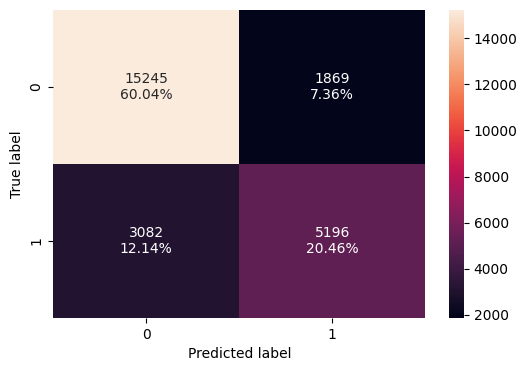

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

**Checking Multicollinearity**

In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

**Variance Inflation factor:** Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  βk  is "inflated" by the existence of correlation among the predictor variables in the model.

**General Rule of thumb:**

If VIF is 1 then there is no correlation among the  k th predictor and the remaining predictor variables, and hence the variance of  βk  is not inflated at all.

If VIF exceeds 5, we say there is moderate multicollinearity.

If VIF is equal or exceeding 10, it shows signs of high multi-collinearity.

The purpose of the analysis should dictate which threshold to use

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39365451.93278
1                           no_of_adults        1.34299
2                         no_of_children        2.00637
3                   no_of_weekend_nights        1.06511
4                      no_of_week_nights        1.09149
5             required_car_parking_space        1.03707
6                              lead_time        1.39281
7                           arrival_year        1.43007
8                          arrival_month        1.27171
9                           arrival_date        1.00666
10                        repeated_guest        1.76765
11          no_of_previous_cancellations        1.37023
12  no_of_previous_bookings_not_canceled        1.61806
13                    avg_price_per_room        2.04856
14                no_of_special_requests        1.24585
15         type_of_meal_plan_Meal Plan 2        1.26460
16         type_of_meal_plan_Meal Plan 3        1.00610
17        type_of_meal_plan_Not Selected        1.27551
18        room_type_reserved_Room_Type 2        1.09146
19        room_type_reserved_Room_Type 3        1.00490
20        room_type_reserved_Room_Type 4        1.35628
21        room_type_reserved_Room_Type 5        1.03320
22        room_type_reserved_Room_Type 6        1.98810
23        room_type_reserved_Room_Type 7        1.10446
24     market_segment_type_Complementary        4.49253
25         market_segment_type_Corporate       17.21348
26           market_segment_type_Offline       64.41691
27            market_segment_type_Online       71.43903

**Observation**

We can see there is no multicollinearity present

**Significance test**

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online']


In [ ]:
X_train2 = X_train[selected_features]
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.3263
Time:                        01:20:18   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -842.7627    119.738     -7.038      0.000   -1077.445    -608.081
no_of_adults                       0.1073      0.037      2.881      0.

**Observation**


Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final ones and lg2 as final model


**Building a Logistic Regression model**

**Coefficient Interpretation**

Coefficient of no of adults, no of weekend nights, no of week nights, led time, arrivsl yesr, no of previous cancellations, avg price per room, type of meal plan 2, type of meal plan not selected, mrket segment type online are positive an increase in these will lead to increase in chances of a person cancelling booking.


Coefficient of required car parking space, arrival month, no of previous cancellations, no of special requests, room type 2,3,5,6,7, market segment offline are negative increase in these will lead to decrease in chances of a person cancelling booking.

**Converting coefficients to odds**

The coefficients ( β s) of the logistic regression model are in terms of  log(odds)  and to find the odds, we have to take the exponential of the coefficients

Therefore,  odds=exp(β)

The percentage change in odds is given as  (exp(β)−1)∗100

In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000       1.11322               1.13348            1.03585   
Change_odd% -100.00000      11.32226              13.34799            3.58509   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.18321    1.01556       1.51566   
Change_odd%                   -81.67936    1.55574      51.56646   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95723         0.05860                       1.29237   
Change_odd%       -4.27741       -94.13952                      29.23694   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01924                 0.22698   
Change_odd%             1.92353               -77.30228   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.18707                         1.21048   
Change_odd%                       18.70686                        21.04827   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.68682                         0.74954   
Change_odd%                       -31.31843                       -25.04625   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.49189                         0.45729   
Change_odd%                       -50.81080                       -54.27129   

             room_type_reserved_Room_Type 7  market_segment_type_Offline  \
Odds                                0.30855                      0.36062   
Change_odd%                       -69.14497                    -63.93833   

             market_segment_type_Online  
Odds                            2.15932  
Change_odd%                   115.93240

**Observation**

1. No_of_adults: Holding all other features constant a 1 unit change in No of adults will increase the odds of a person having cancelling booking by ~1.11 times or a ~11% increase in odds of having cancelled booking.

2. No_of_weekend_nights: Holding all other features constant a 1 unit change in No of weekend nights will increase the odds of a person having cancelling booking by ~1.11 times or a ~11% increase in odds of having cancelled booking.

3. No_of_week_nights: Holding all other features constant a 1 unit change in No of week nights will increase the odds of a person having cancelling booking by ~1.03 times or a ~4% increase in odds of having cancelled booking.

4. required_car_parking_space: Holding all other features constant a 1 unit change in required car parking space will decrease the odds of a person having cancelling booking by ~81.77 times or a ~0.18% decrease in odds of having cancelled booking.

5. Lead_time: Holding all other features constant a 1 unit change in lead time will increase the odds of a person having cancelling booking by ~1.55 times or a ~1% increase in odds of having cancelled booking.

6. arrival_month: Holding all other features constant a 1 unit change in arrival month will decrease the odds of a person having cancelling booking by ~4.27 times or a ~0.95% deccrease in odds of having cancelled booking.

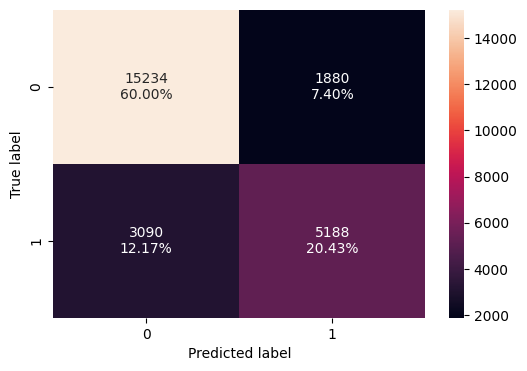

In [ ]:
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
log_reg_model_train_perf= model_performance_classification_statsmodels(lg2, X_train2, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80427 0.62672    0.73401 0.67614

**Observation**

The F1 for the training set is 67.61%.

**Model performance evaluation**

In [ ]:
X_test2 = X_test[list(X_train2.columns)]

In [ ]:
X_test2=X_test2.astype(float)

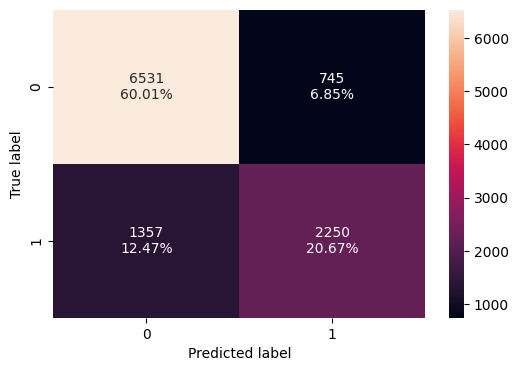

In [ ]:
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [ ]:
log_reg_model_test_perf= model_performance_classification_statsmodels(lg2, X_test2, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80685 0.62379    0.75125 0.68161

**Observation**

The F1 for test set is 68.16%

The model is giving a good f1_score of ~0.676 and ~0.681 on the train and test sets respectively

As the train and test performances are comparable, the model is not overfitting

Moving forward we will try to improve the performance of the model

**Model performance improvement**

Let's see if the f1_score can be improved further by changing the model threshold.
First, will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold.

Next, will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score ROC curve is between FPR and TPR.

**ROC-AUC**

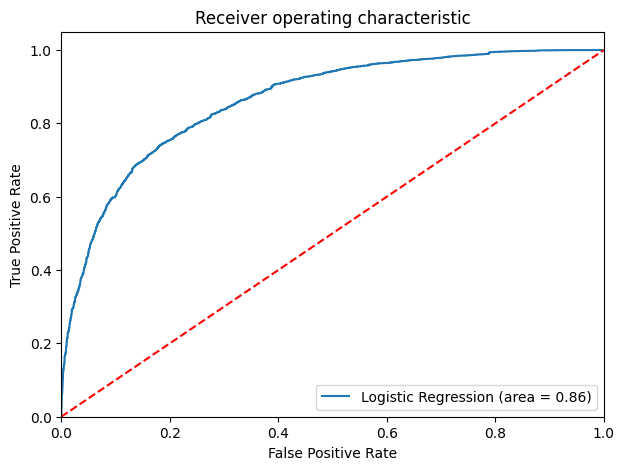

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Optimal threshold using AUC ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36266991407415156


**Checking model performance on training**

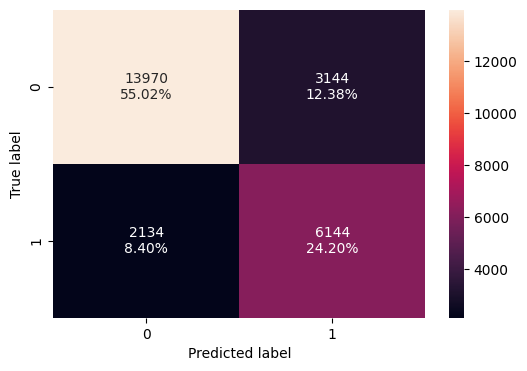

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79214 0.74221    0.66150 0.69953

**Check model performnace on test**

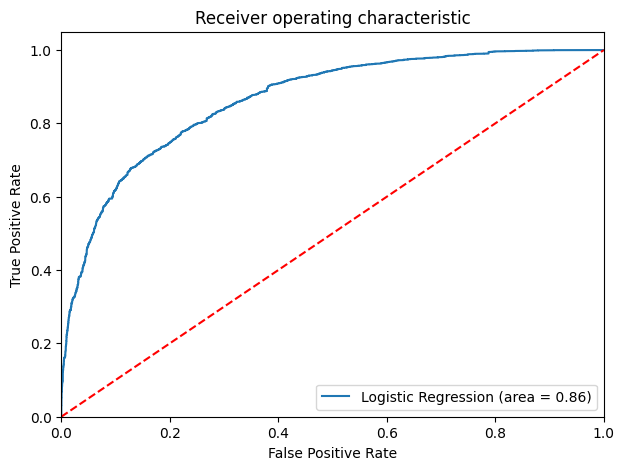

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

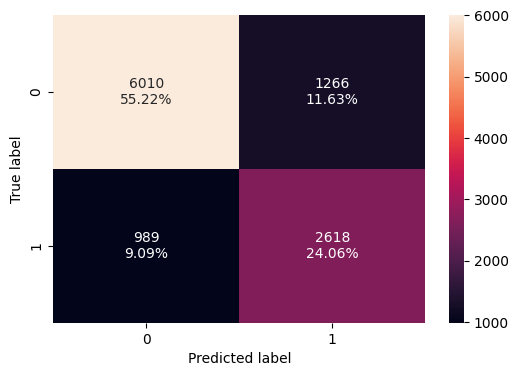

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79280 0.72581    0.67405 0.69897

**Precision Recall Curve**

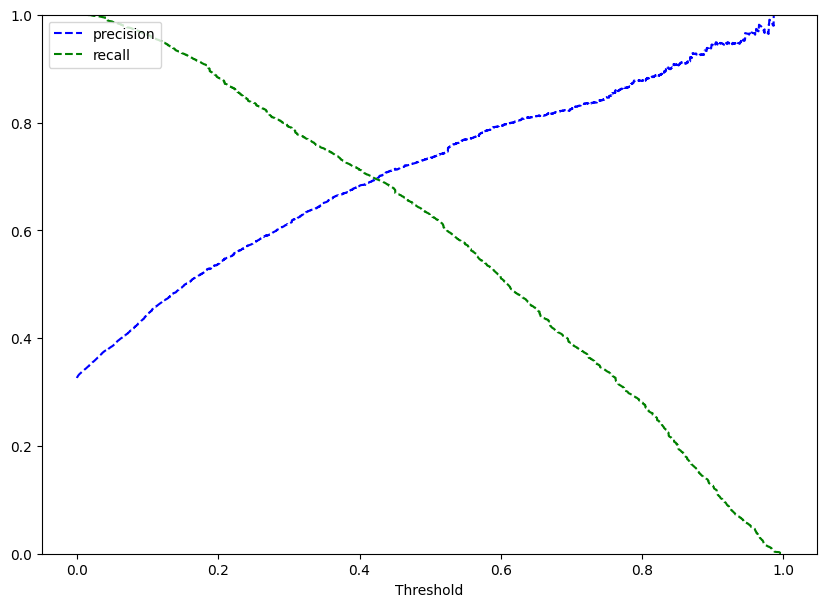

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**At threshold of 0.42, there is a balance between recall and precision.**

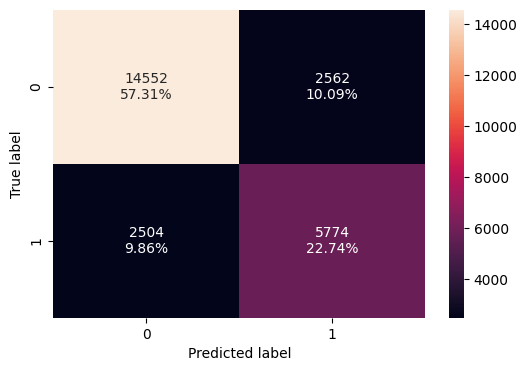

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80049 0.69751    0.69266 0.69508

**Checking model performance on test**

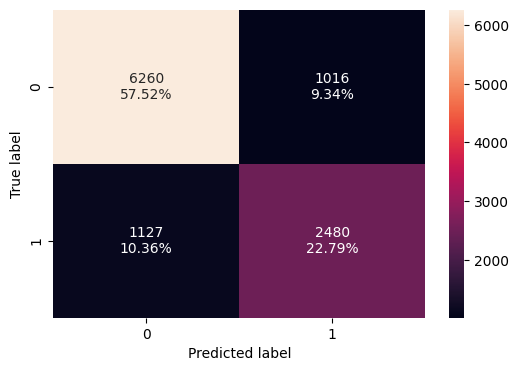

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80309 0.68755    0.70938 0.69830

**Final Model Summary**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80427   
Recall                                         0.62672   
Precision                                      0.73401   
F1                                             0.67614   

           Logistic Regression-0.36 Threshold  \
Accuracy                              0.79214   
Recall                                0.74221   
Precision                             0.66150   
F1                                    0.69953   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80049  
Recall                                0.69751  
Precision                             0.69266  
F1                                    0.69508

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.36 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80685   
Recall                                         0.62379   
Precision                                      0.75125   
F1                                             0.68161   

           Logistic Regression-0.36 Threshold  \
Accuracy                              0.79280   
Recall                                0.72581   
Precision                             0.67405   
F1                                    0.69897   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80309  
Recall                                0.68755  
Precision                             0.70938  
F1                                    0.69830

**The model with threshold 0.36 is giving the best F1 score. Therefore, it can be selected as the final model.**

**Building a Decision Tree model**

In [ ]:
X=df.drop('booking_status', axis=1)
y=df['booking_status']
print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
X=pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67399
1   0.32601
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.66857
1   0.33143
Name: proportion, dtype: float64


In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

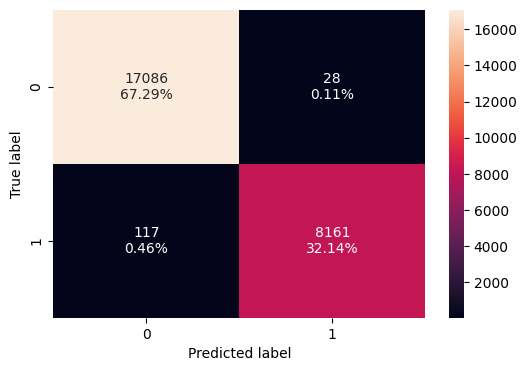

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99429 0.98587    0.99658 0.99119

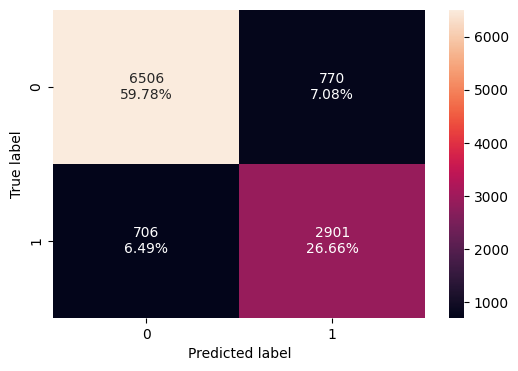

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.86438 0.80427    0.79025 0.79720

**Visualize the decision tree**

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


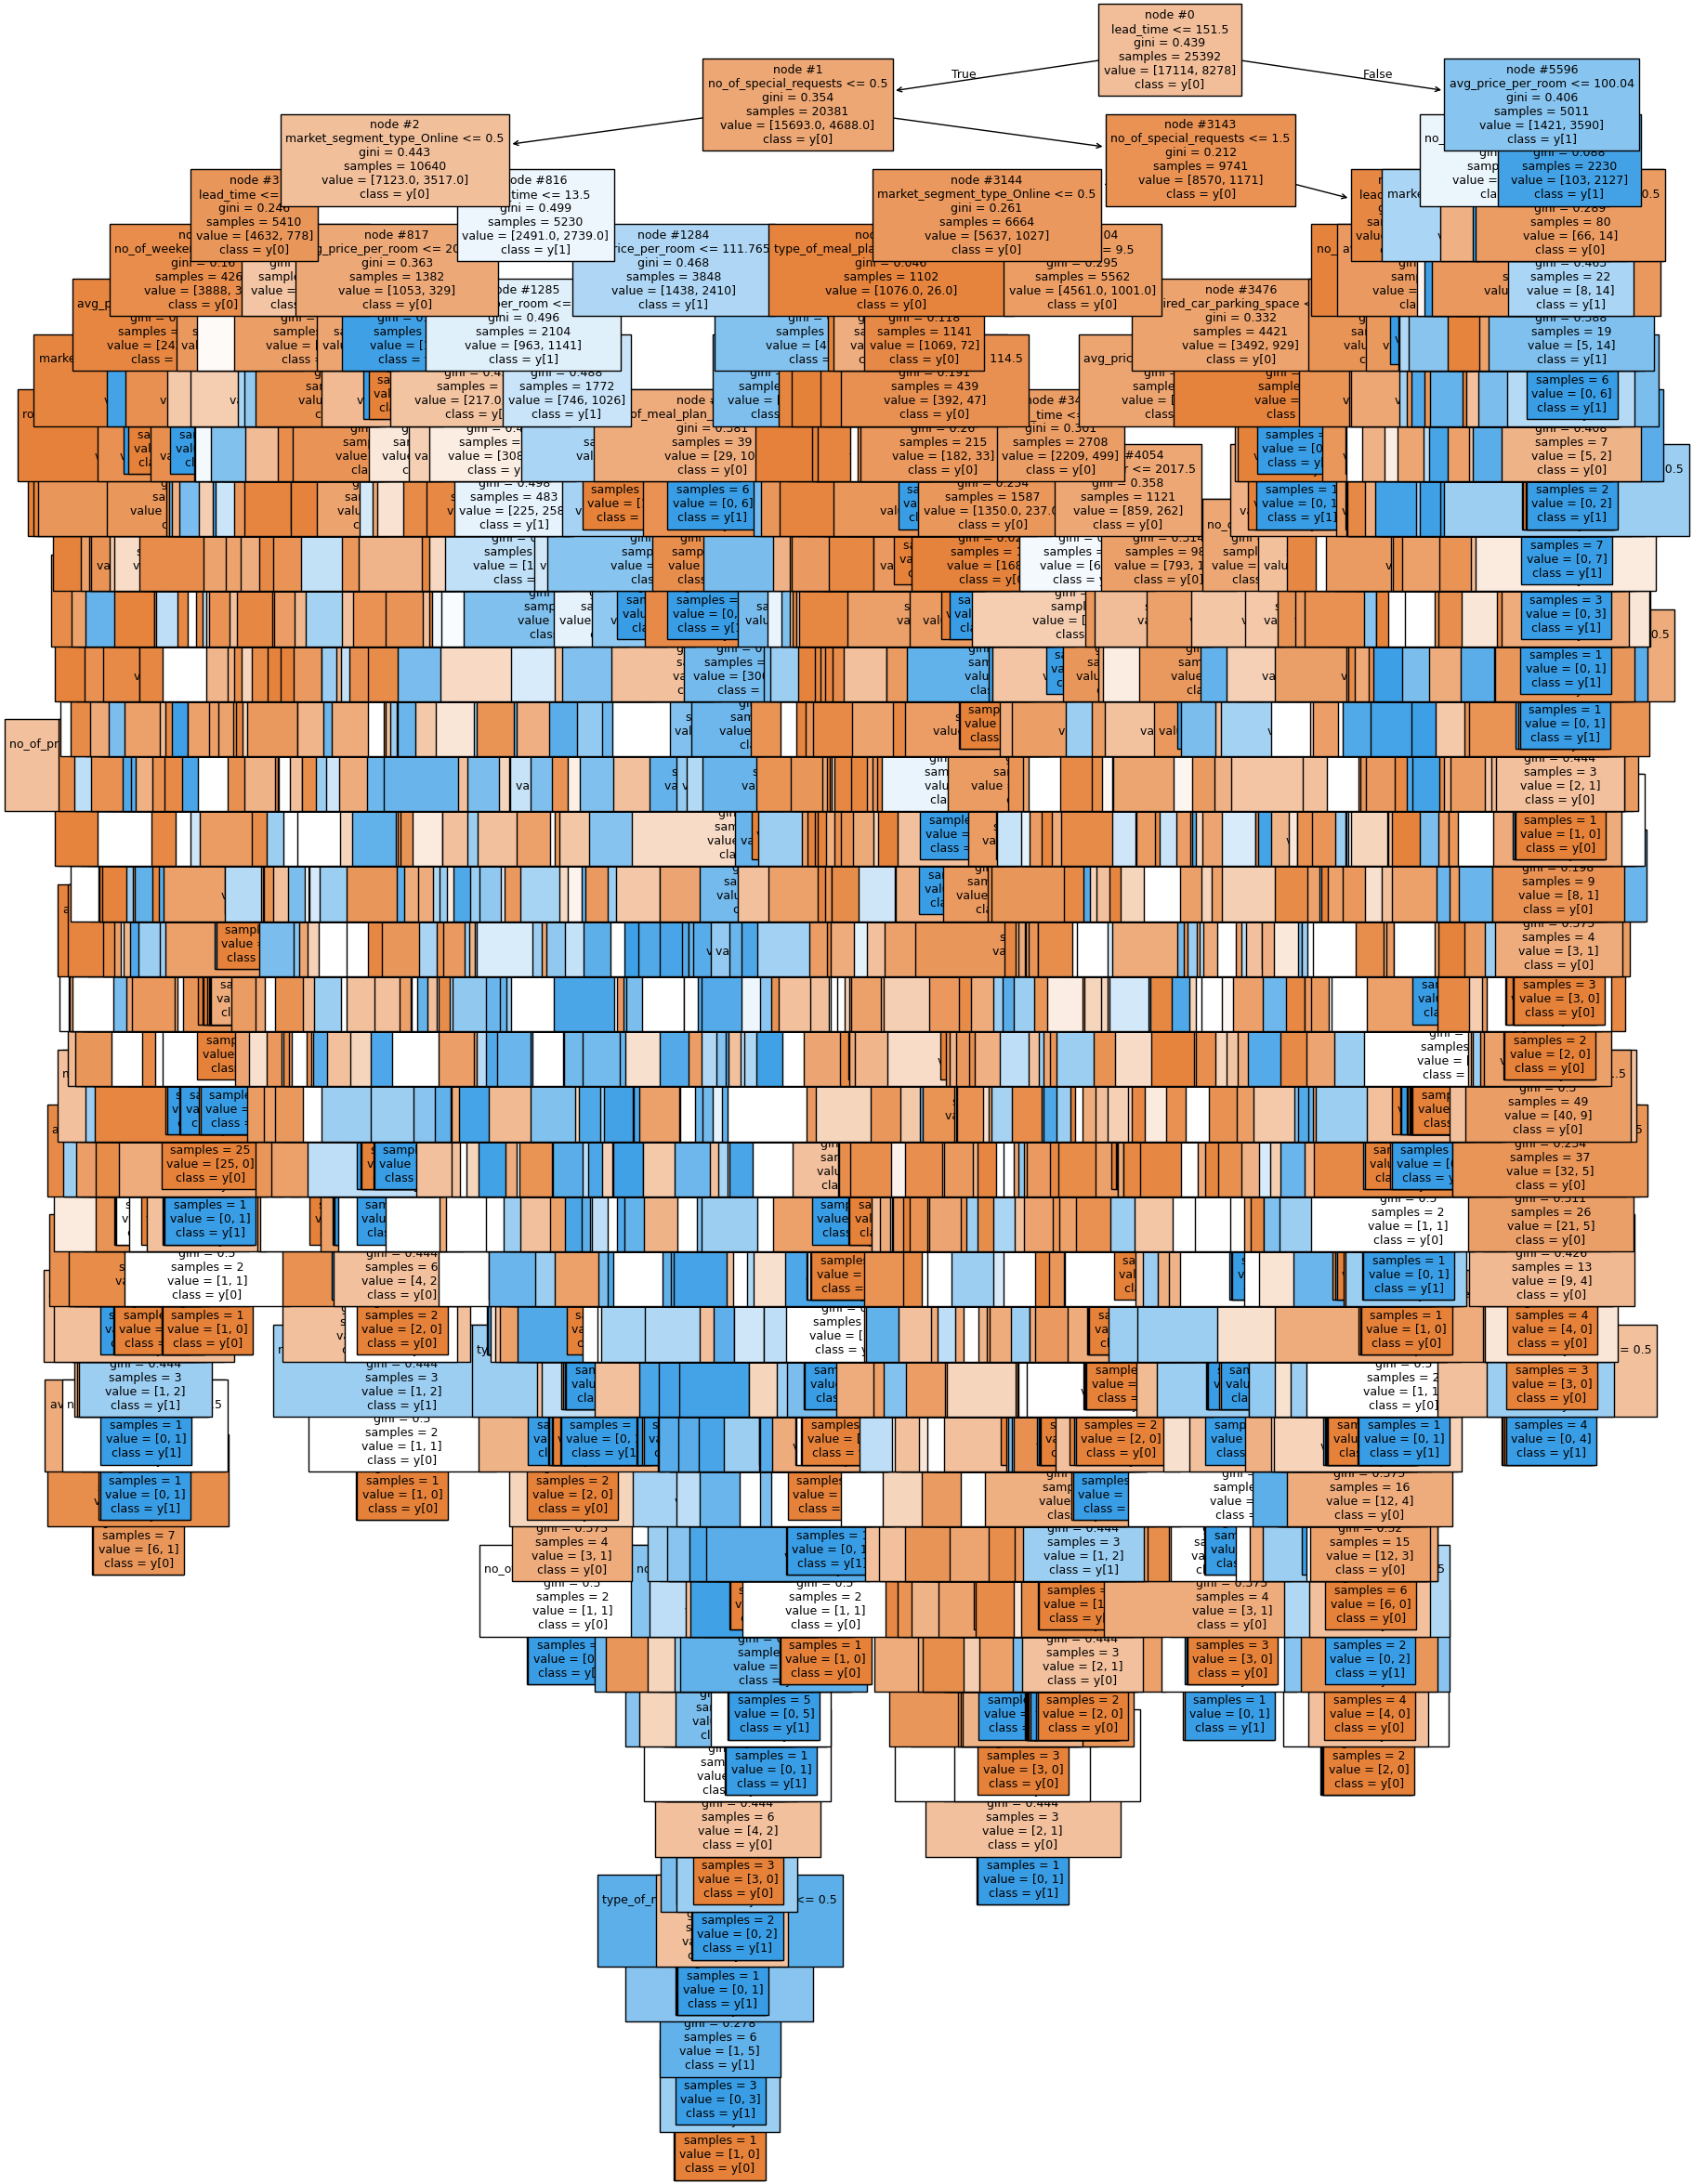

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 93.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [80.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  93.00
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 23.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  23.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   

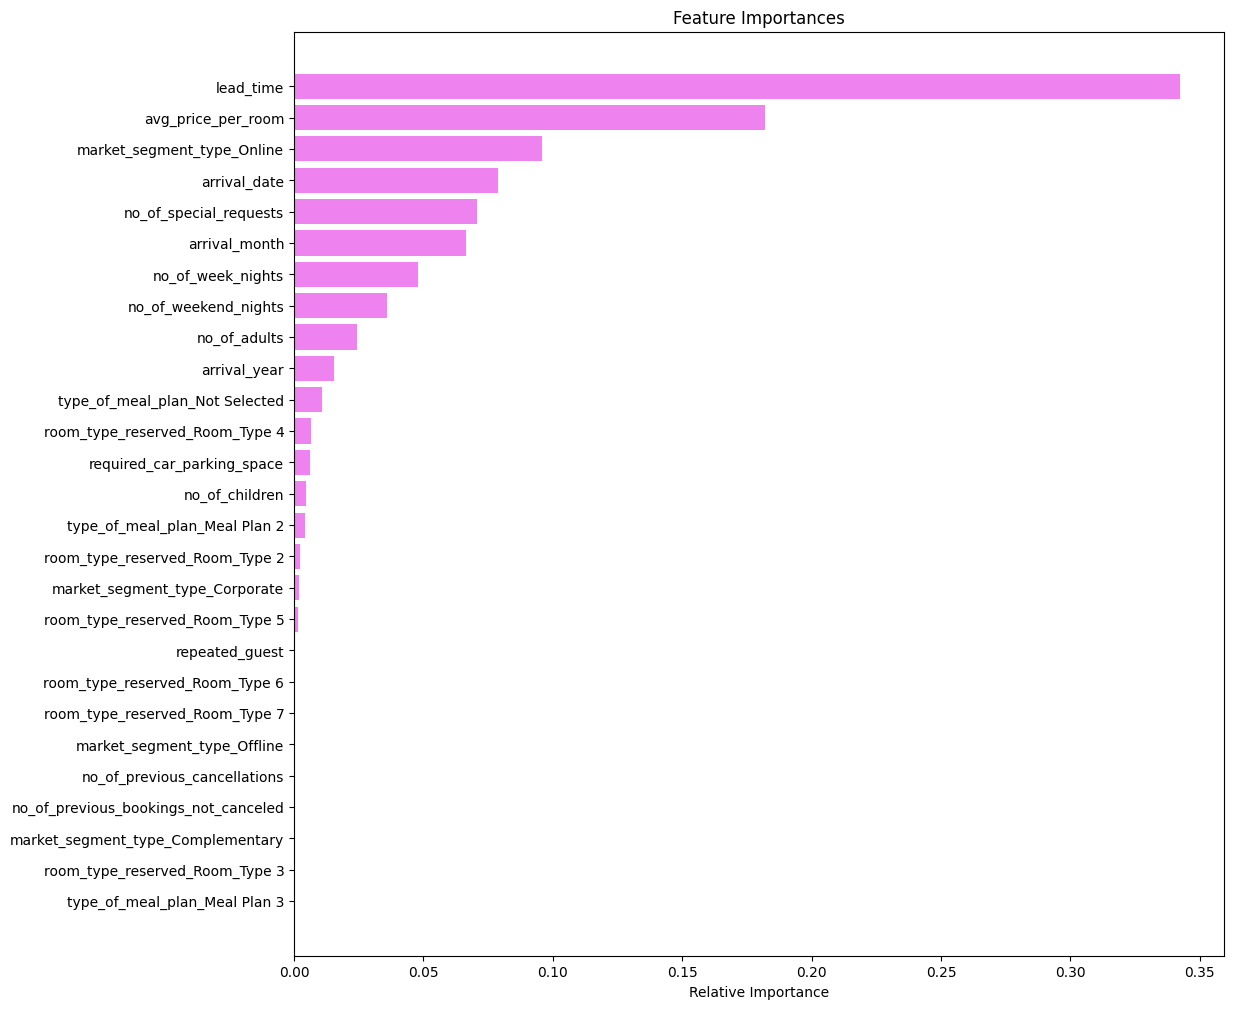

In [ ]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Lead time, average price per room and market segment online are the top 3 important features.**

**Decision Tree Pruning**


Decision trees can be pruned by 2 ways:-

Pre pruning- Decision tree can be pruned by reducing the depth of tree through hyperparameter so that tree cannot grow beyond that depth.

Post pruning also called as cost complexity pruning. In this, alpha is calculated and, alpha is error of pruned tree- error of original tree divided by number of nodes reduced through pruning. Subtree with minimum alpha is selected and will remove that subtree which has min alpha.

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

**Checking performance on training set**

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.84554 0.69365    0.80556 0.74542

Recall and F1 has decreased as compared to intial model

**Checking performance on test set**

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.84269 0.68423    0.81158 0.74248

Recall and F1 has decreased as compared to initial model.

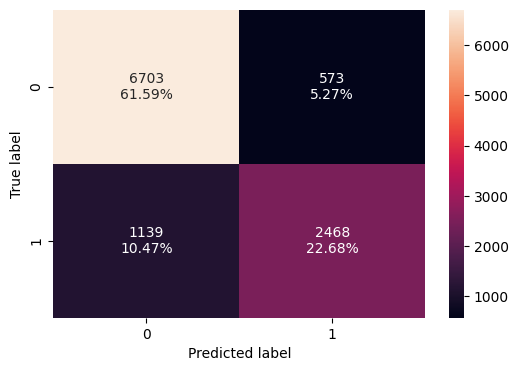

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

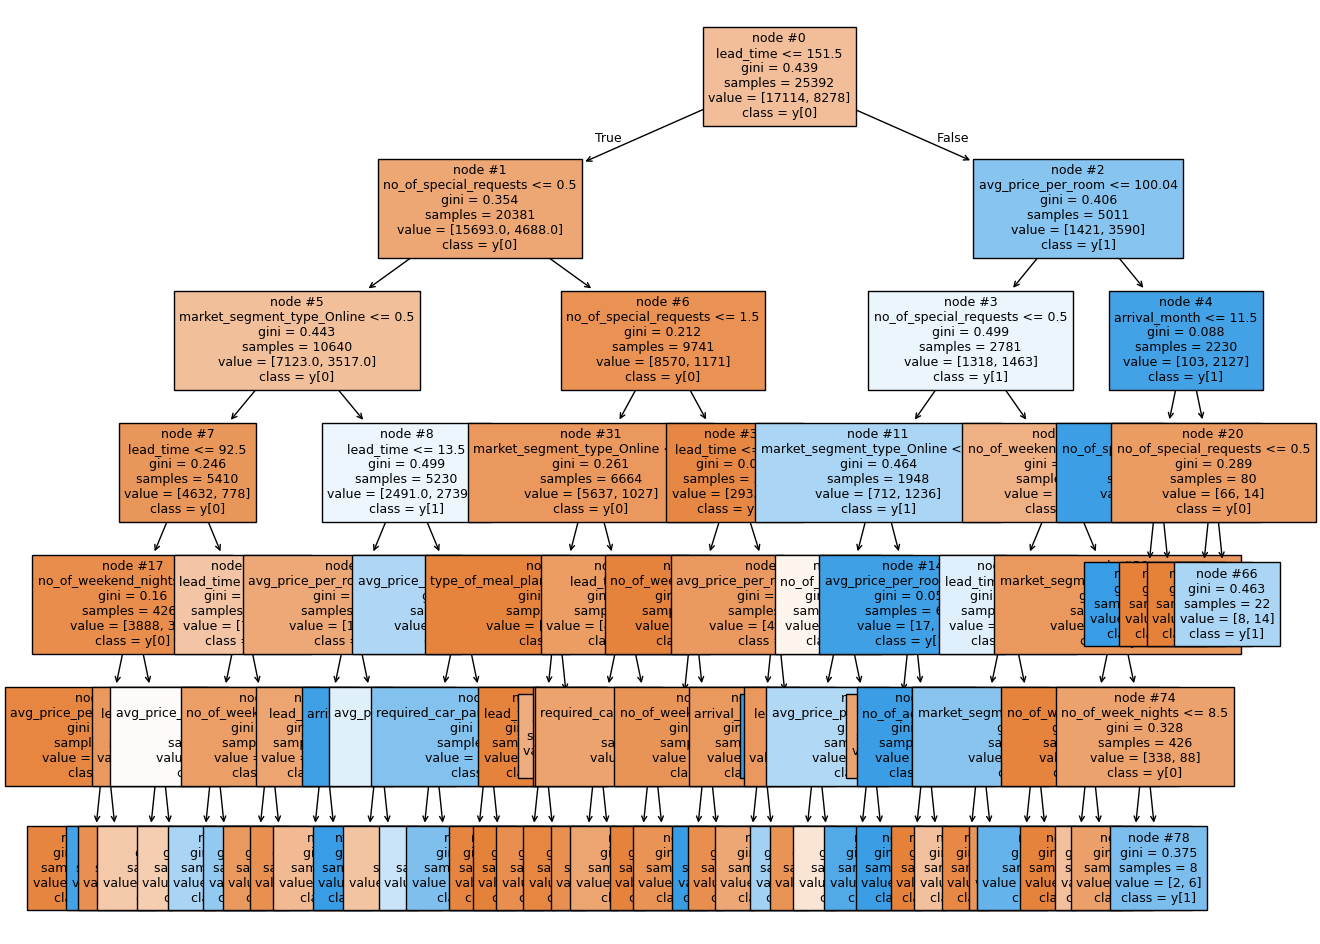

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00761
1       -0.00000     0.00761
2        0.00000     0.00762
3        0.00000     0.00762
4        0.00000     0.00762
...          ...         ...
1352     0.00709     0.28665
1353     0.01207     0.29872
1354     0.01784     0.31655
1355     0.02397     0.36450
1356     0.07495     0.43945

[1357 rows x 2 columns]

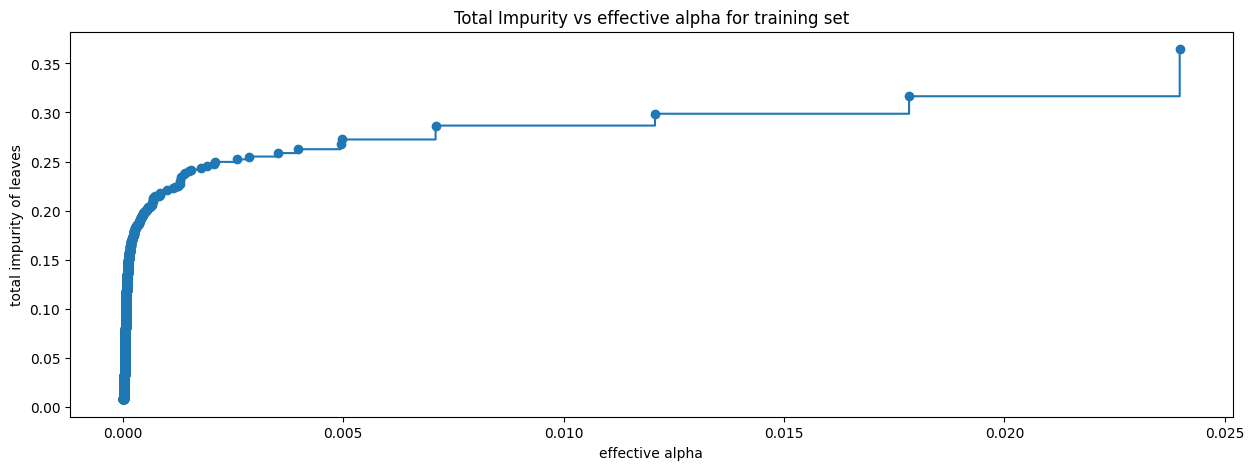

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    ccp_alpha = max(0,ccp_alpha)
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07495203066381123


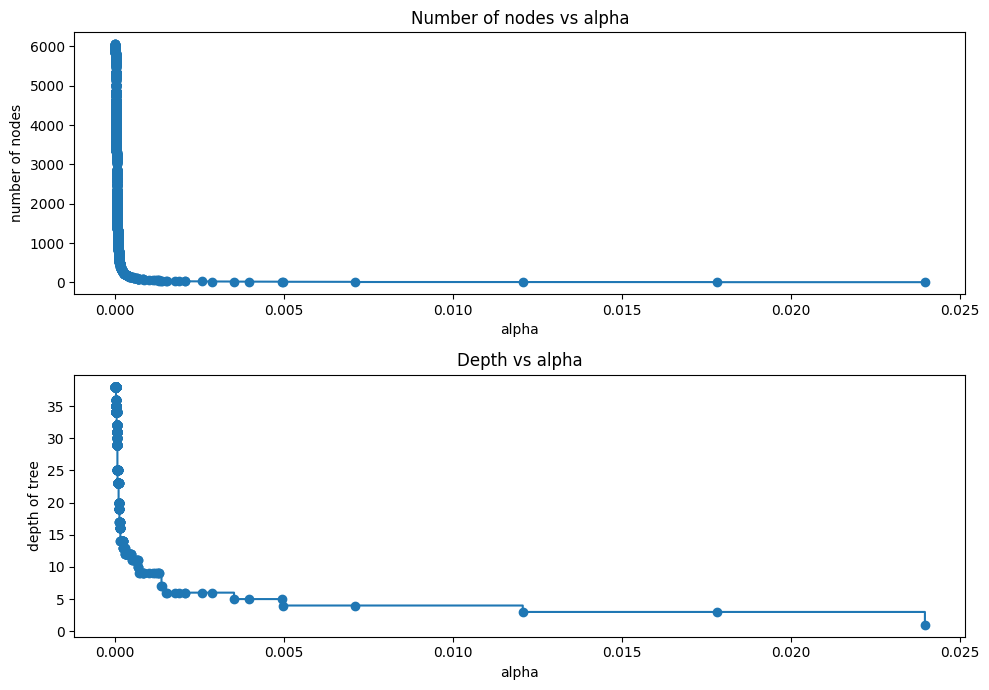

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**f1 vs Alpha for training and test set**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

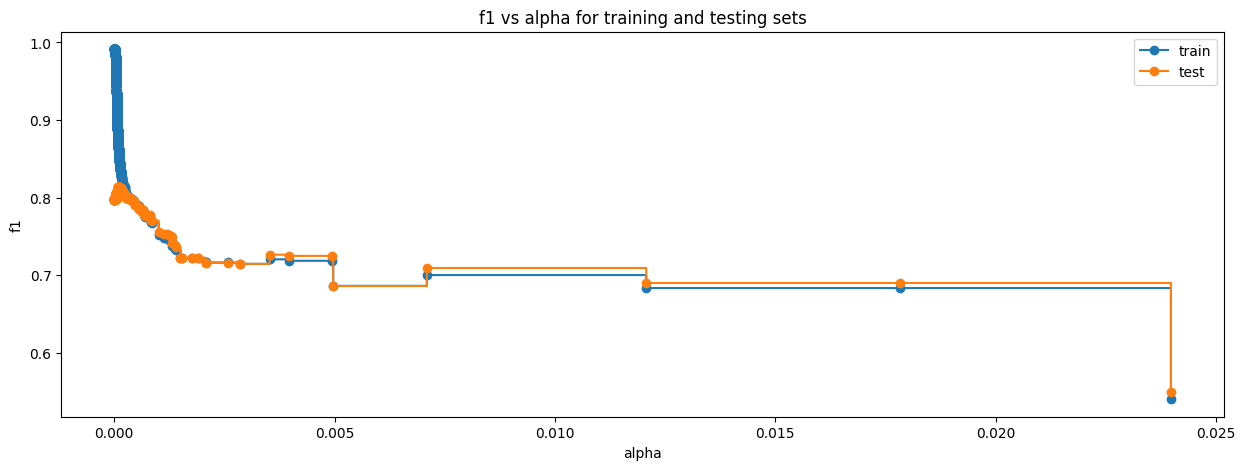

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1")
ax.set_title("f1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test f1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00011322730587104229),
                       random_state=1)


**Checking model performance on training set**

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.90848 0.82302    0.88803 0.85429


Recall and F1 has increased as compared to pre-pruning.

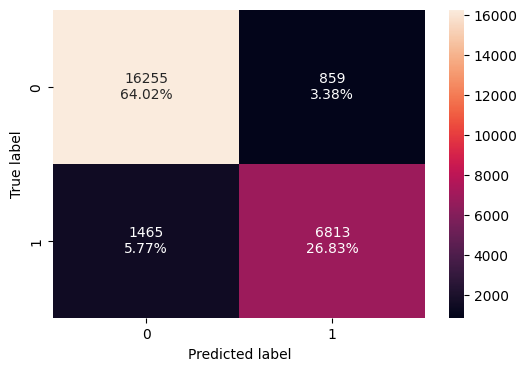

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

**Checking model performane on test set**

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.88174 0.78098    0.85003 0.81404

Recall and F1 has increased as compared to pre-pruning.

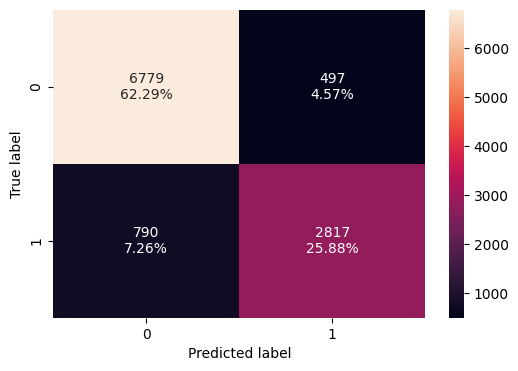

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

**Visualize decision tree**

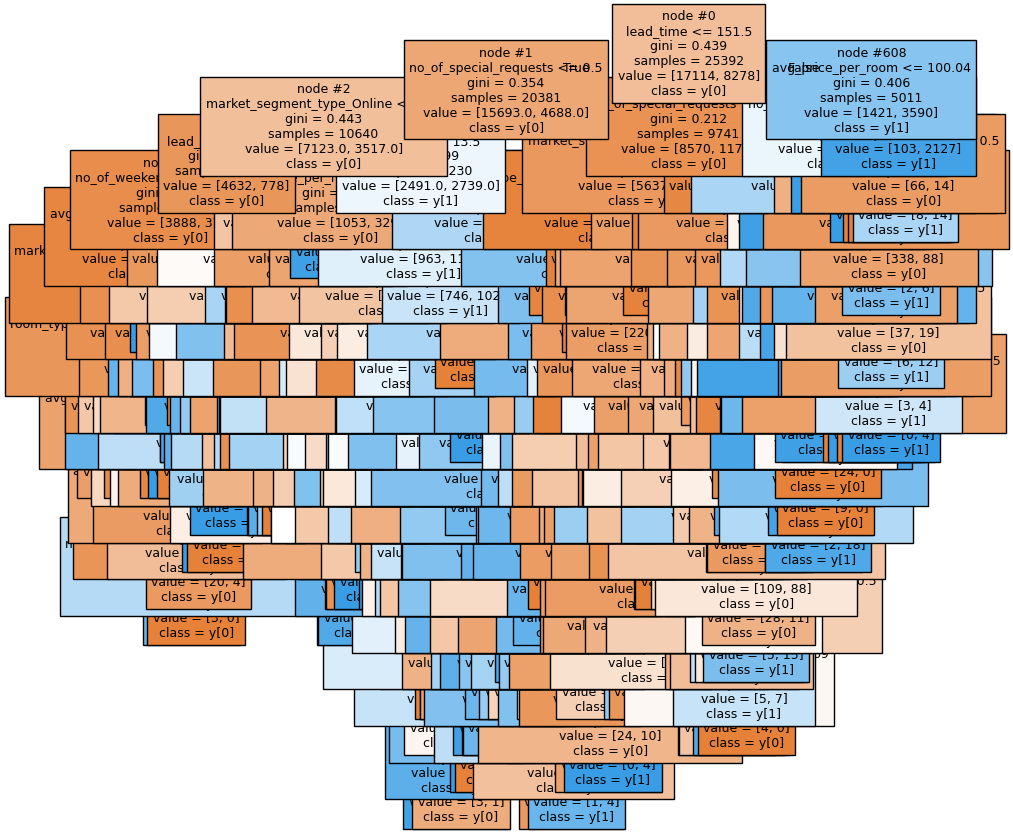

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- weights: [1814.00, 6.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [291.00, 26.00] class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [137.00, 32.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.38337
avg_price_per_room                   0.16861
market_segment_type_Online           0.13838
no_of_special_requests               0.10143
arrival_month                        0.06072
arrival_date                         0.03428
no_of_week_nights                    0.02475
no_of_weekend_nights                 0.02198
no_of_adults                         0.02088
arrival_year                         0.01993
required_car_parking_space           0.00905
type_of_meal_plan_Not Selected       0.00547
room_type_reserved_Room_Type 4       0.00256
type_of_meal_plan_Meal Plan 2        0.00241
market_segment_type_Corporate        0.00198
room_type_reserved_Room_Type 5       0.00123
room_type_reserved_Room_Type 2       0.00103
no_of_children                       0.00095
repeated_guest                       0.00061
room_type_reserved_Room_Type 6       0.00039
no_of_previous_cancellations         0.00000
no_of_prev

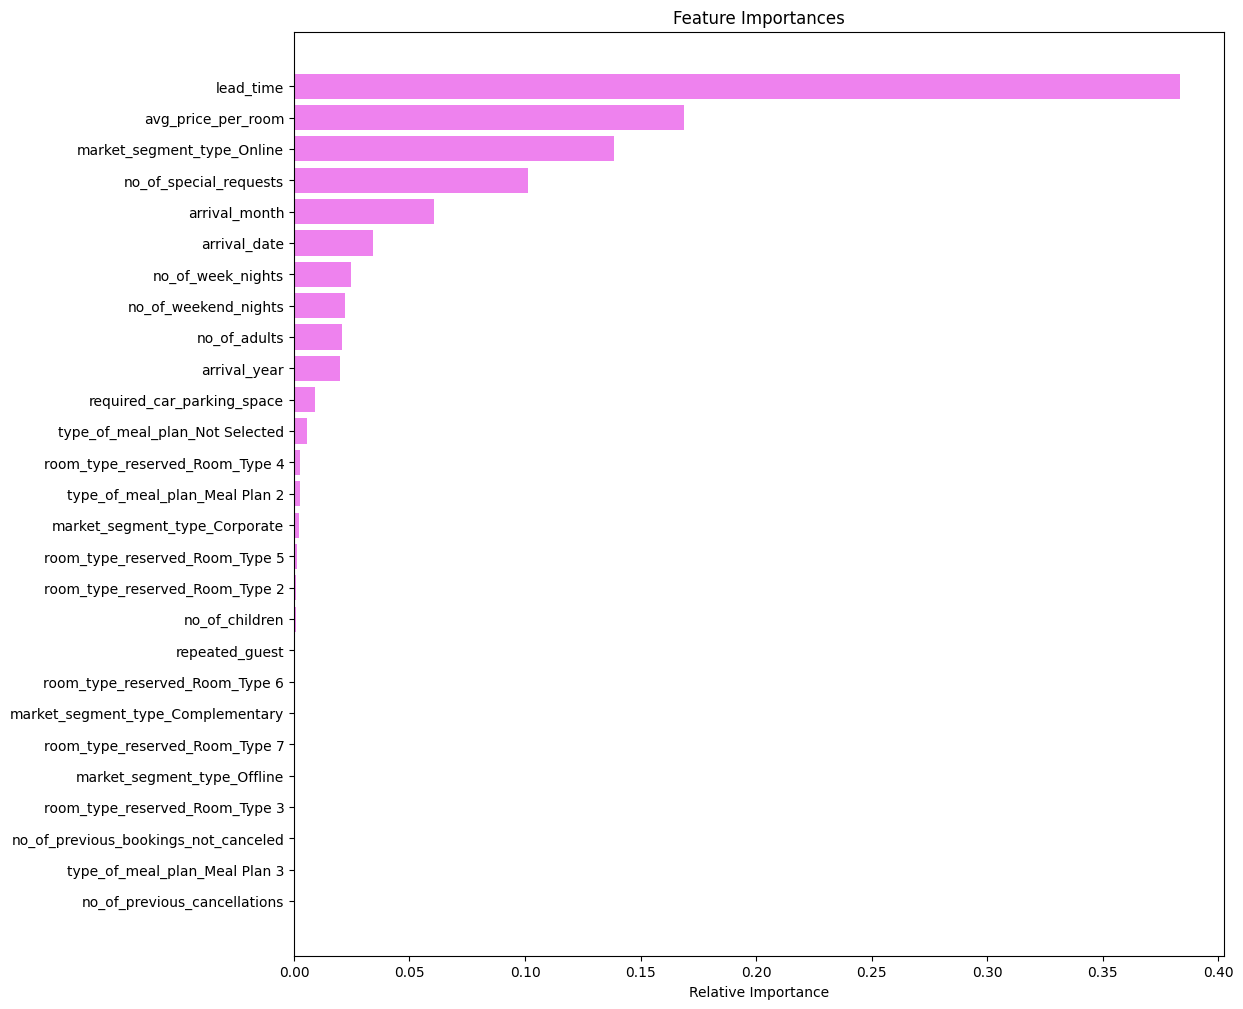

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Lead time, average price per room amd market segment online are the top three features.**

**Model Performance Comparison and Conclusions**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99429                      0.84554   
Recall                   0.98587                      0.69365   
Precision                0.99658                      0.80556   
F1                       0.99119                      0.74542   

           Decision Tree (Post-Pruning)  
Accuracy                        0.90848  
Recall                          0.82302  
Precision                       0.88803  
F1                              0.85429

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99429                      0.84269   
Recall                   0.98587                      0.68423   
Precision                0.99658                      0.81158   
F1                       0.99119                      0.74248   

           Decision Tree (Post-Pruning)  
Accuracy                        0.88174  
Recall                          0.78098  
Precision                       0.85003  
F1                              0.81404

As recall and F1 both has increased on training and test set after post pruning. Therefore, post pruned tree is consisdered as the best model.

**Actionable Insights and Recommendations**


1. 72% of data shows that 2 adults in each room stay at hotel.

2. 92.6% represents children don’t stay at hotel.

3. The longest stay at hotel including weekend nights is 7 and longest stay at hotel including week nights is 17. 46.6% donot prefer weekend nights and 27.6% spend 1 weekend night while 31.5% prefer 2 week nights.

4. 75% of guests prefer to book hotel 126 days before arrival.

5. Mean average price is 103.42 euros with 75% of guests prefer average price under 120 euros.

6. 96.9% guests donot require car parking space

7. Most preferred month to stay in hotel is October and second preferred month is September. Those who stay at hotel in October or September have not cancelled the booking.

8. Guests mostly prefer to visit in middle of the month rather than end of the month.

9. Least are the repeated guests for hotel stay. More than 97% of guests are first time visitors.

10. 54.5% donot require special request; 31.4% require only 1 special request

11. 67.2% has cancelled the booking while 32.8% have not cancelled the booking.

12. 76.7% guests prefer only breakfast

13. 77.5% guets like room type 1; 16.7% like room type 4 and none of guests like room type 3.

14. 64% guests prefer online as market segment; 29% prefer offline as market segment.

15. Lead time, average price per room and market segment online are the top three features.

16. Therefore, most preference is 2 adults without children stay in one room each in hotel. Guests like to book through online market segment 126 days before arriving at the hotel and they are mostly interested in average price of less than 120 euros as room type 1 without car parking space and mostly with breakfast as a meal.

17. Also, guests are not repeated guests and they are first time visitors who mostly prefer to visit in October or September month in middle of the month rather than end of month.

18. Moreover, more than 50% donot require special request and if in case guests require special request, they are looking for 1 type of special requests.

19. INN hotel can focus on lead time, average price per room and market segment online as the top three features to be profitable.

20. INN hotel more focus should be on 2 adults with room type 1 of average price of 120 euros including breakfast booked online for month of October and without car parking space.